### **``Exploration Notebook``** 
``Equity Impact on Employee Attrition in the Workplace``

``Created by: Mijail Q. Mariano``

``13AUGUST2022``

----

In [1]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np
import random

# importing acquire module
import acquire

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "darkgrid")

# plotly/visual import
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# file cleaning modules
from skimpy import clean_columns

# scipy import
# import scipy.stats as stats
# from math import sqrt

# importing datetime module
# import datetime

# sklearn data science library
# from sklearn.impute import KNNImputer
# from sklearn.impute import MissingIndicator
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.metrics import mean_squared_error
# from sklearn.impute import IterativeImputer
# from sklearn.cluster import KMeans

# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.feature_selection import SelectKBest, RFE, f_regression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

----
#### **``Initial Planning/Ideas``**

Individual Data Science Project:

Mijail Mariano

August 13th 2022

**<u>``1. Formulating the question``</u>**

``This question should be:``

* About social equity or of similar importance (i.e., inequality, racial discrimination, social-mobility, equal opportunity)
* The question is to be freamed in a way that can be quantitatively measured in terms of organizational value & also raises the question around -  “How equal/diverse or fair is an organization's current workplace?”

**target variable: "Attrition"**

**<u>``2. Exploration questions``</u>**

**``What are you attempting to predict/help to address:``**

``Employee/Company Attrition Rate``

* What is company attrition?
* Why is company attrition important?
* What are the employee attrition demographics?
* Are there pros to attrition? If so, what are these?

**``What specifically are you attempting to investigate/understand:``**

``Equity in the workplace and its impact on attrition``

*Ok, but what specifically?...*

``Do socioeconomic/location factors such as:``

* Where an employee is from/grows-up (County level) impact whether or not they remain with a company?
* The high-school graduation rate
* Incarceration/prison rate
* Fraction of population married by 35 years old
* Poverty rate
* Teenage birth rate

``Are there other questions that may be important to answer?``

How much does an employee's geographical background (where they are from) impact their decision to remain or leave the company?
Are there socioeconomic/employee demographic differences between those employees who leave the company and those who remain? (descriptive/summary statistics)

**<u>``3. Methodology``</u>**

**``Note:``** 

For this project I am assuming the company's geographical location to be New York City, NY and that employees are only from counties within the three (3) tri-state areas. This includes counties solely from the state's of Connecticut, New Jersey, and New York. To conduct the analysis I will also use a random generator to blindly assign birthplace/locations where employees grew-up and the socioeconomic variables from those locations to statistically explore these variables.

``Where’s the data from?``

To conduct this analysis and potentially generate a predictive company attrition model I combine real socioeconomic and economic data from Harvard’s Opportunity Atlast with an artificially created 2017 IBM Human Resources Kaggle dataset of a small-medium sized company (~1500 records). .

The Opportunity Atlas is a collaborative social equality project through Harvard University, the US Census Bureau, and the US Internal Revenue Service. The initiative’s aim is to track and plot socioeconomic data by exact US states, counties, cities, and neighborhoods in order to understand the childrens’ outcomes and prospect of social mobility. 

*The Atlas is composed of ~21mil Americans born between 1978-1983 who are in their mid-late thirties today. The platform and estimates are based on:

* The 2000 and 2010 Decennial Census short form
* Federal income tax returns for 1989, 1994, 1995, and 1998-2015
* Data from the American Community Survey

<u>Reference Links:</u>
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* https://www.opportunityatlas.org/

``Why couldn’t you use a real dataset?``

Given the sensitive nature of real employee information, it is relatively difficult to attain similar publicly available data from businesses. Additionally, since it is not common for organizations to collect similar socioeconomic information/drivers that I attempt to investigate - the combination of synthetic and real data seemed like an adequate method for scientific testing.

``So how should I think about this data?``

You can think about this data and the subsequent estimates as a way to understand how geographical/environmental characteristics potentially play a role in employee tenure. Additionally, these estimates may also help organizations to understand potential employee equity differences in order to address them and successfully retain essential employees. 

``Why might these employees decide to leave their company?`` 

(said another way)....
How might these demographic differences contribute to an employee’s decision to stay or leave their company?

Ok, so what happens if employers don’t retain these employees?

**<u>``4. What can employers do to retain these employees?``</u>**

(placeholder for recommendations)


``Opportunity Atlas (Equity DF): features/variables``

1. High_School_Graduation_Rate_rP_gP_pall\
Fraction of children who grew up in this area with a high school degree or a GED. Estimates have a margin of error; for example, standard error at county level for children with parents at 25th percentile is 1% pooling race and gender groups and 3% for black men. This outcome is available only at the county (not tract) level due to small sample sizes. (Source: American Community Survey)

2. Household_Income_at_Age_35_rP_gP_pall\
Average annual household income in 2014-15 for children (now in their mid-30s) who grew up in this area. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is $1,917 pooling race and gender groups and $2,721 for black men. (Source: Federal income tax records)

3. Incarceration_Rate_rP_gP_pall\
Fraction of children who grew up in this area who were in prison or jail on April 1, 2010. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 1% pooling race and gender groups and 4% for black men. (Source: 2010 Decennial Census)

4. Fraction_Married_at_Age_35_rP_gP_pall\
Fraction of children who grew up in this area who are married in 2015 (in their mid-30s). Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 3% pooling race and gender groups and 4% for black men. (Source: Income Tax Records)

5. Poverty_Rate_in_2012-16\
Fraction of all residents of this area with household incomes below the federal poverty line in 2012-16. (Source: American Community Survey.)

6. Teenage_Birth_Rate_women_only_rP_gF_pall\
Fraction of women who grew up in this area who claimed ever a child who was born when the women were between the ages of 13 and 19 as a dependent when filing taxes. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 4% pooling race groups and 6% for black women. (Source: Income Tax Records)


``IBM Dataset: features/variables``
1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


----

### **``Data Acquisition and Preparation``**

In [2]:
# let's import the IBM employee data first

ibm_df = pd.read_csv("/Users/mijailmariano/Desktop/IBM_HR-Employee-Attrition.csv")
print()
print(f'IBM dataset shape: {ibm_df.shape}')
ibm_df.head()


IBM dataset shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# let's import the opportunity atlas data

equity_df = pd.read_csv("/Users/mijailmariano/Desktop/equity_table.csv")
print()
print(f'Equity dataset shape: {equity_df.shape}')
equity_df.head()


Equity dataset shape: (17, 12)


,county_name,state,cty,distance,household_income_at_35,high-school_graduation_rate,percentage_married_by_35,incarceration_rate,women_teenage_birthrate,poverty_rate,employment_rates_at_35yrs,single_parent_frac
0,Bergen County,NJ,cty34003,19 miles,63424,0.94,0.51,0.00,0.04,0.07,0.80,0.20
1,Bronx County,NY,cty36005,10 miles,32542,0.78,0.22,0.02,0.28,0.31,0.74,0.59
2,Essex County,NJ,cty34013,20 miles,43298,0.89,0.33,0.02,0.20,0.17,0.78,0.43
3,Fairfield County,CT,cty09001,30 miles,55614,0.92,0.46,0.01,0.09,0.09,0.79,0.26
4,Hudson County,NJ,cty34017,9 miles,41374,0.87,0.35,0.01,0.19,0.18,0.78,0.37


In [4]:
# replacing/removing the word "miles" in distance

# equity_df["distance"] = equity_df["distance"].str.replace("miles", "").astype(int)
# equity_df.dtypes.sort_values()

In [5]:
# number of unique county distances

equity_df["distance"].nunique()

10

In [6]:
# let's use pandas' qcut method to parse out distance groups
# [(0.971, 10.667] < (10.667, 20.333] < (20.333, 30.0]

# intervals = pd.Series(pd.cut(
#         equity_df["distance"], 
#         bins = equity_df["distance"].nunique(), 
#         duplicates = "drop").sort_values().tolist())

# intervals.unique()

In [7]:
# viewing counties by distance sorted

# equity_df[["county_name", "distance"]].sort_values("distance")

In [8]:
# setting counties by distance
# [(0.971, 3.9], (3.9, 6.8], (6.8, 9.7], (9.7, 12.6], (18.4, 21.3], (24.2, 27.1], (27.1, 30.0]]

# area_one = equity_df[equity_df["distance"] <= 5].county_name.tolist()
# area_two = equity_df[(equity_df["distance"] > 5) & (equity_df["distance"] <= 10)].county_name.tolist()
# area_three = equity_df[(equity_df["distance"] > 10) & (equity_df["distance"] <= 21)].county_name.tolist()
# area_four = equity_df[(equity_df["distance"] > 21) & (equity_df["distance"] <= 27)].county_name.tolist()
# area_five = equity_df[(equity_df["distance"] > 27) & (equity_df["distance"] <= 30)].county_name.tolist()

# print(area_one)
# print('----------------------------------------------------')
# print(area_two)
# print('----------------------------------------------------')
# print(area_three)
# print('----------------------------------------------------')
# print(area_four)
# print('----------------------------------------------------')
# print(area_five)

In [9]:
# creating a function to randomly apply county based on the employee's distance from home

def get_county(x, lst_a, lst_b, lst_c, lst_d, lst_e):
        '''where x = employees' work distance from home in miles. 
        function will iterate through all records and randomly assign a county based on distance from work.'''
        lst = []

        if x <= 5:
                county = random.choice(lst_a)
                lst.append(county)

        elif x > 5 and x <= 10:
                county = random.choice(lst_b)
                lst.append(county)

        elif x > 10 and x <= 21:
                county = random.choice(lst_c)
                lst.append(county)
        
        elif x > 27 and x <= 30:
                county = random.choice(lst_e)
                lst.append(county)

        else:
                county = lst_d[0]
                lst.append(county)

        # returning the list of counties
        return lst

In [10]:
# creating a random generated county list 

# random.seed(548)
# county_lst = ibm_df["DistanceFromHome"].apply(get_county, args = (area_one, area_two, area_three, area_four, area_five))
# # let's flatten the county list
# county_lst = [val for sublist in county_lst for val in sublist]
# county_lst[:5]

In [11]:
# let's create a pandas series and assign the county list to the ibm dataframe

# county_lst = pd.Series(county_lst)
# county_lst.shape

In [12]:
# assigning the county series to the ibm dataframe

# ibm_df["county_name"] = county_lst
# ibm_df.head() # checks out!

In [13]:
# merging the two tables/dfs on county name
# bringing over socioeconomic data from equity_df 

# emp_df = ibm_df.merge(
#     equity_df,
#     how = "left",
#     left_on = "county_name",
#     right_on = "county_name"
# ).drop(columns = "distance")

# emp_df.head() # checks out!

In [14]:
# catching the dataframe

# emp_df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/emp_df.csv", index = False)

In [16]:
# importing the dataframe 

df = acquire.get_employee_df()
df.head()

df shape: (1470, 46)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,county_name,state,cty,household_income_at_35,high-school_graduation_rate,percentage_married_by_35,incarceration_rate,women_teenage_birthrate,poverty_rate,employment_rates_at_35yrs,single_parent_frac
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Bronx County,NY,cty36005,32542,0.78,0.22,0.02,0.28,0.31,0.74,0.59
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,New York County,NY,cty36061,37826,0.81,0.29,0.01,0.19,0.17,0.73,0.34


In [ ]:
# can consider removing/dropping the following features/columns
# "over_18": all employees meet this criteria
# "employee_count": redundant information

df = acquire.clean_employee_df(df)
df.head()

df shape: (1470, 43)


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,county_name,state,cty,household_income_at_35,high_school_graduation_rate,percentage_married_by_35,incarceration_rate,women_teenage_birthrate,poverty_rate,employment_rates_at_35yrs,single_parent_frac
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,Bronx County,NY,cty36005,32542,0.78,0.22,0.02,0.28,0.31,0.74,0.59
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Kings County,NY,cty36047,37229,0.84,0.32,0.01,0.20,0.23,0.73,0.38
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,New York County,NY,cty36061,37826,0.81,0.29,0.01,0.19,0.17,0.73,0.34


In [17]:
# let's check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1470 non-null   int64  
 1   Attrition                    1470 non-null   object 
 2   BusinessTravel               1470 non-null   object 
 3   DailyRate                    1470 non-null   int64  
 4   Department                   1470 non-null   object 
 5   DistanceFromHome             1470 non-null   int64  
 6   Education                    1470 non-null   int64  
 7   EducationField               1470 non-null   object 
 8   EmployeeCount                1470 non-null   int64  
 9   EmployeeNumber               1470 non-null   int64  
 10  EnvironmentSatisfaction      1470 non-null   int64  
 11  Gender                       1470 non-null   object 
 12  HourlyRate                   1470 non-null   int64  
 13  JobInvolvement    

In [18]:
# initial summary statistics

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

,count,mean,std,min,25%,50%,75%,max,range
Age,1470.00,36.92,9.14,18.00,30.00,36.00,43.00,60.00,42.00
DailyRate,1470.00,802.49,403.51,102.00,465.00,802.00,1157.00,1499.00,1397.00
DistanceFromHome,1470.00,9.19,8.11,1.00,2.00,7.00,14.00,29.00,28.00
Education,1470.00,2.91,1.02,1.00,2.00,3.00,4.00,5.00,4.00
EmployeeCount,1470.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
EmployeeNumber,1470.00,1024.87,602.02,1.00,491.25,1020.50,1555.75,2068.00,2067.00
EnvironmentSatisfaction,1470.00,2.72,1.09,1.00,2.00,3.00,4.00,4.00,3.00
HourlyRate,1470.00,65.89,20.33,30.00,48.00,66.00,83.75,100.00,70.00
JobInvolvement,1470.00,2.73,0.71,1.00,2.00,3.00,3.00,4.00,3.00
JobLevel,1470.00,2.06,1.11,1.00,1.00,2.00,3.00,5.00,4.00


In [21]:
# let's loop through and inspect columns and unique values

for col in df.columns:
    print(f'Column: {col.upper()}')
    print(f'Date type: {df[col].dtype}')
    print(f'Missing values: {df[col].isnull().any()}')
    print(f'Number of unique values: {df[col].nunique()}')
    print(f'Data Sample: {list(df[col].head(10).sort_values())}')
    print('-------------------------------------------------------------------')

Column: AGE
Date type: int64
Missing values: False
Number of unique values: 43
Data Sample: [27, 30, 32, 33, 36, 37, 38, 41, 49, 59]
-------------------------------------------------------------------
Column: ATTRITION
Date type: object
Missing values: False
Number of unique values: 2
Data Sample: ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes']
-------------------------------------------------------------------
Column: BUSINESS_TRAVEL
Date type: object
Missing values: False
Number of unique values: 3
Data Sample: ['Travel_Frequently', 'Travel_Frequently', 'Travel_Frequently', 'Travel_Frequently', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely']
-------------------------------------------------------------------
Column: DAILY_RATE
Date type: int64
Missing values: False
Number of unique values: 886
Data Sample: [216, 279, 591, 1005, 1102, 1299, 1324, 1358, 1373, 1392]
-----------------------------------------------------

<function matplotlib.pyplot.show(close=None, block=None)>

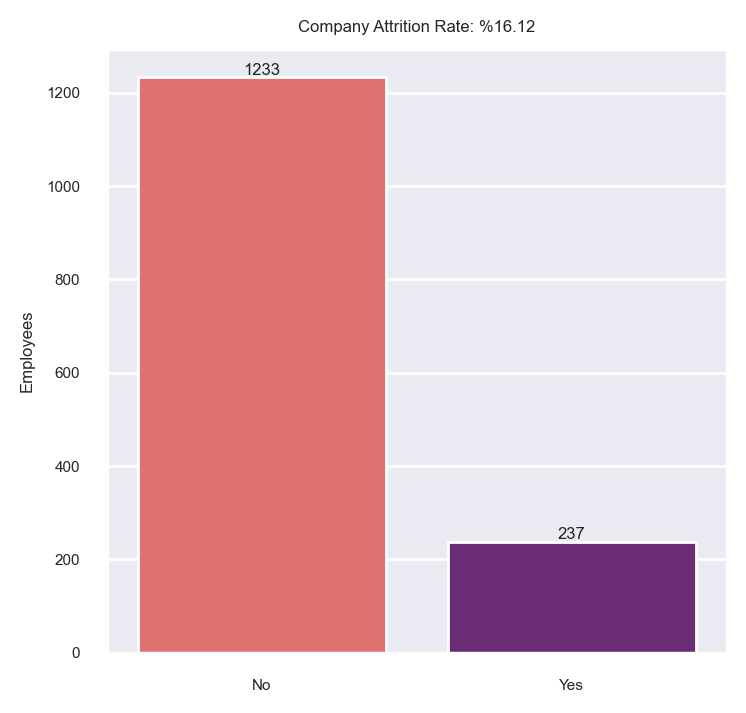

In [22]:
# let's examine the target variable
plt.figure(figsize = (4, 4))
sns.set(font_scale = 0.5)

ax = sns.countplot(df["attrition"].sort_values(), palette="magma_r")

ax.bar_label(ax.containers[0])
plt.title('Company Attrition Rate: %{:.2f}'.format((len(df[df["attrition"] == "Yes"])/df.shape[0])*100))
plt.xlabel(None)
plt.ylabel("Employees")
plt.show

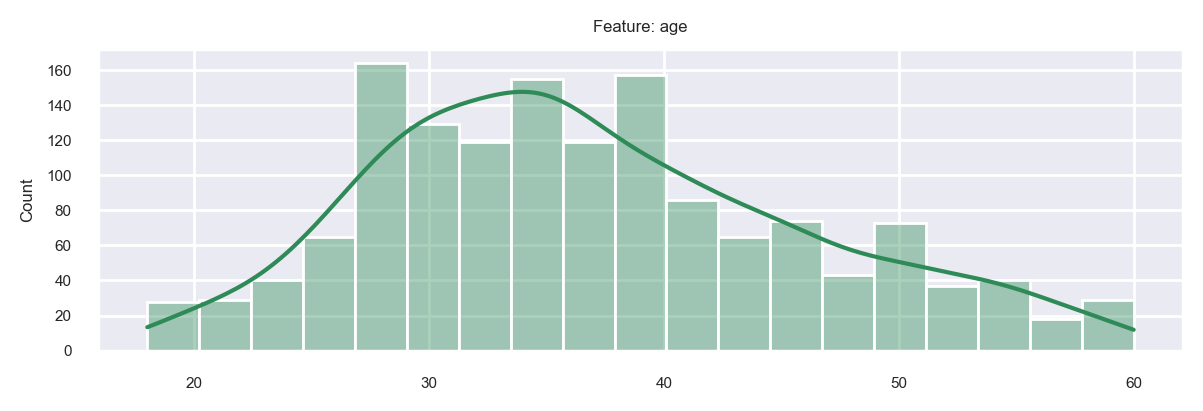

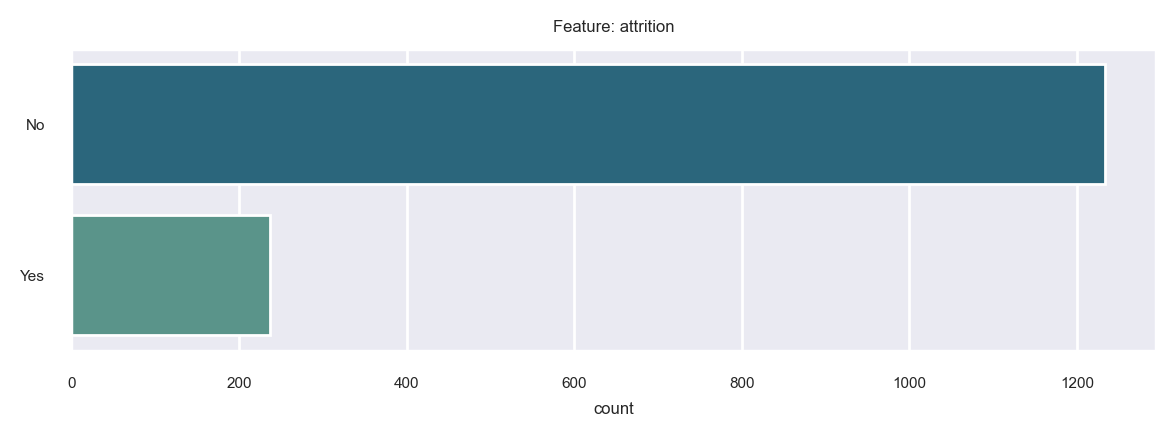

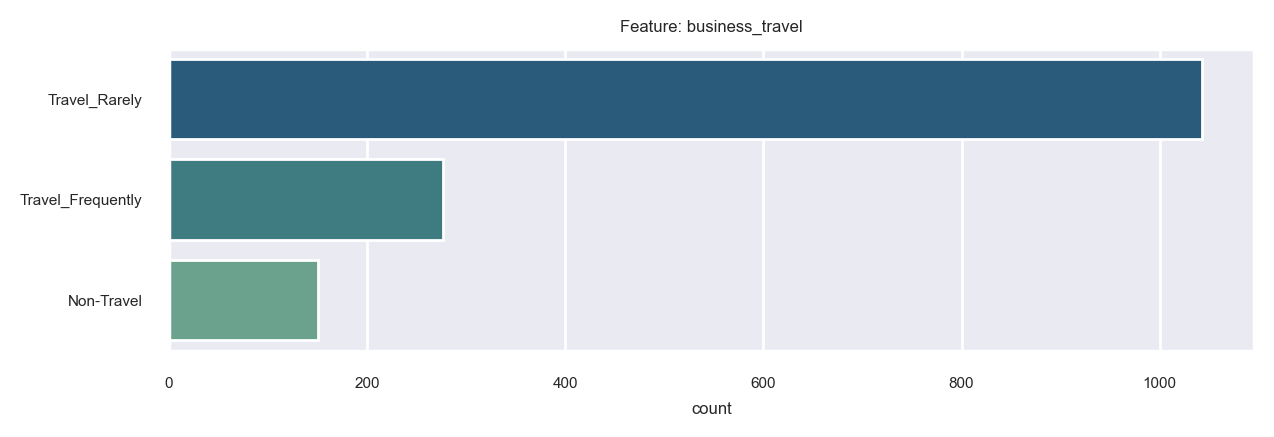

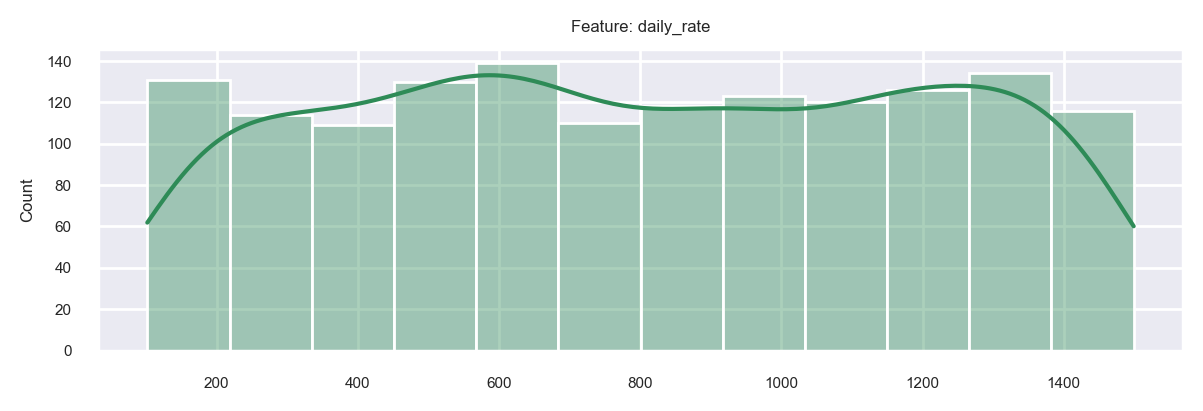

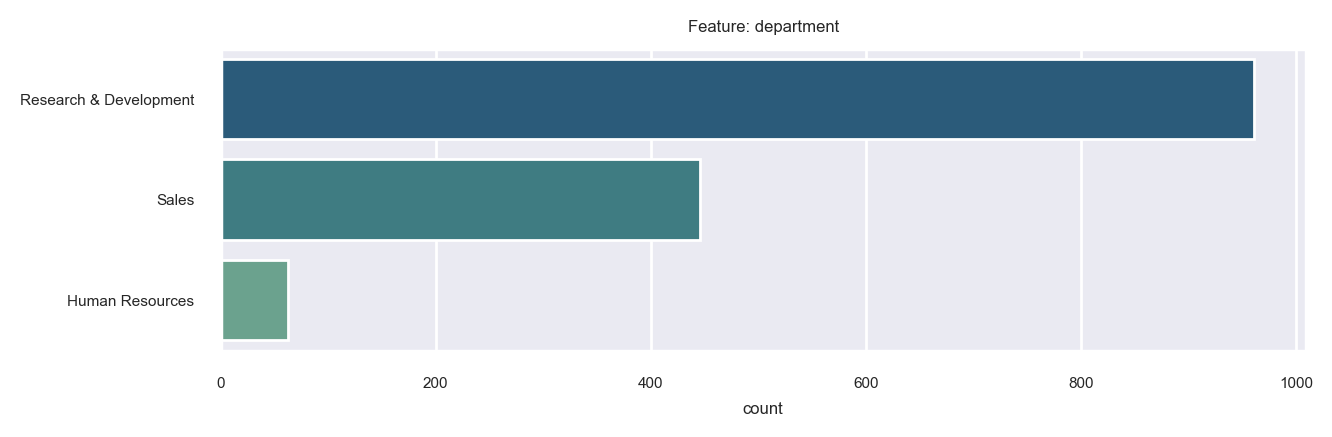

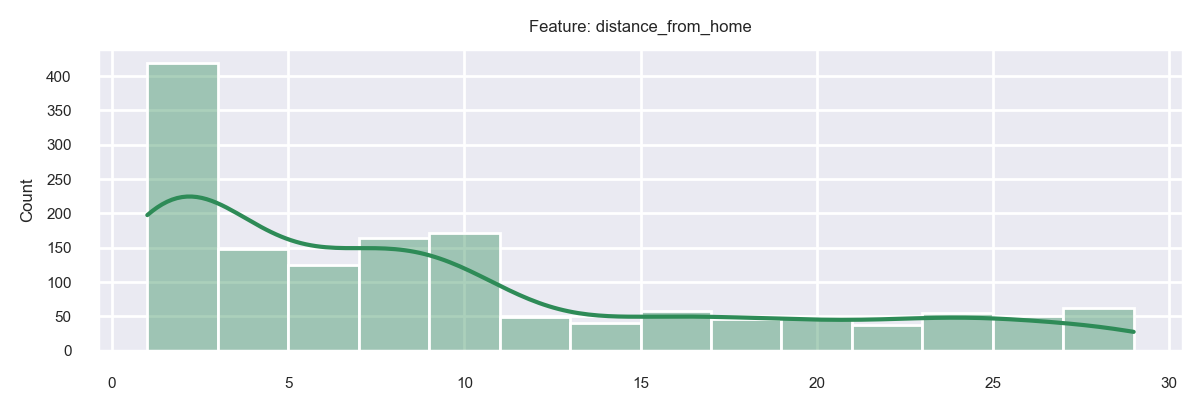

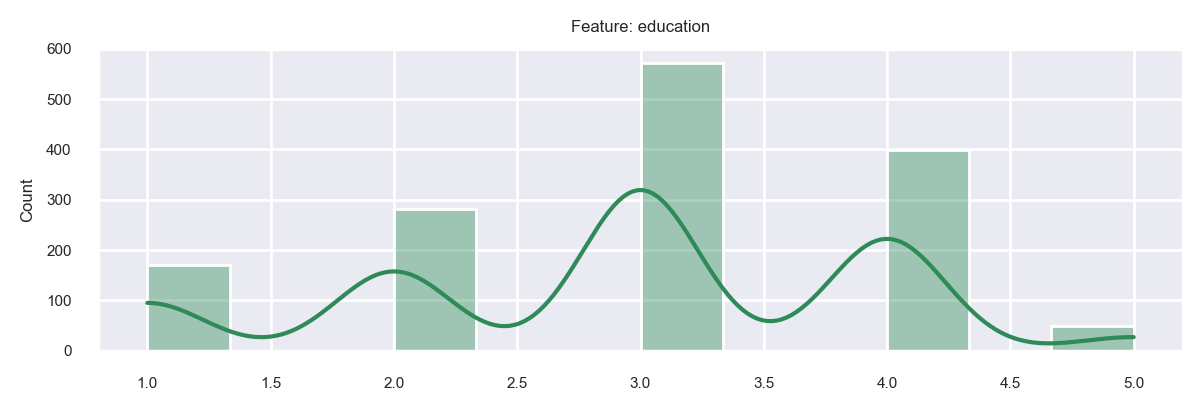

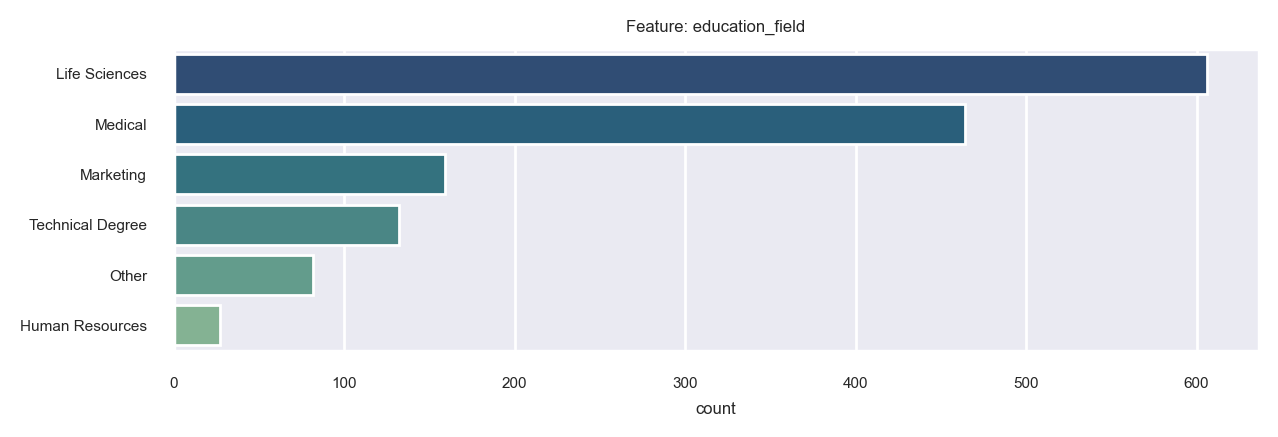

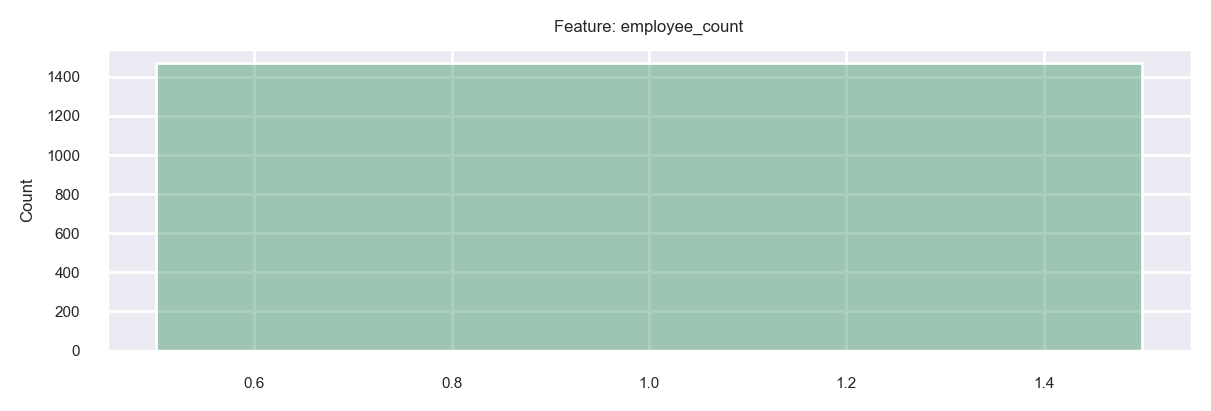

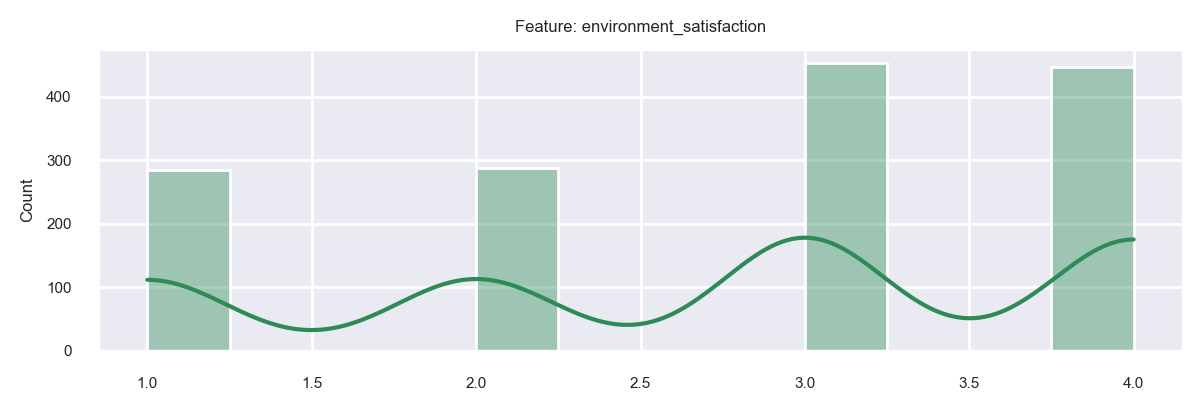

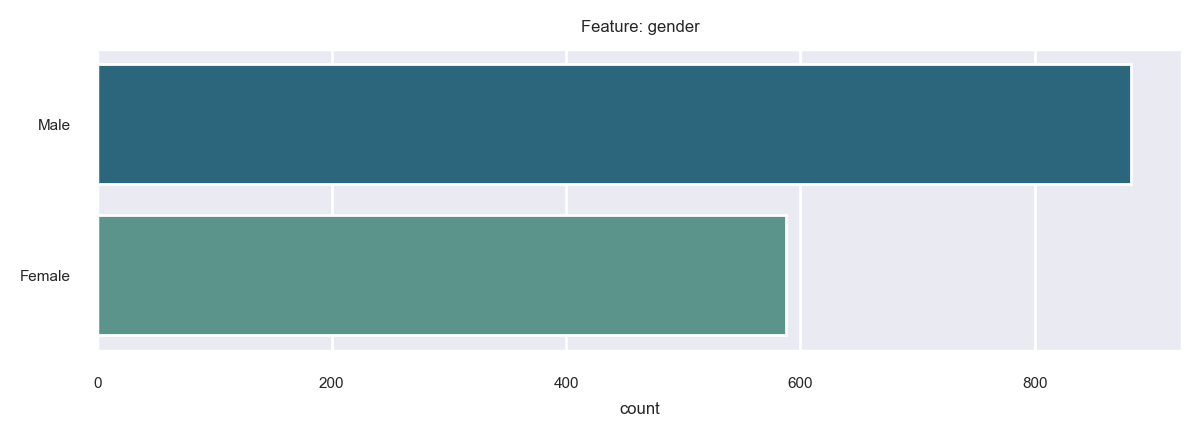

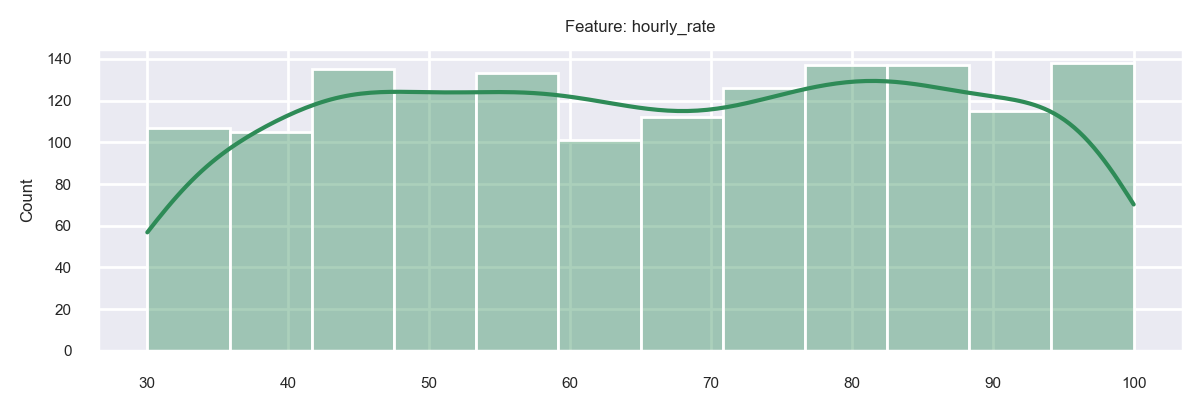

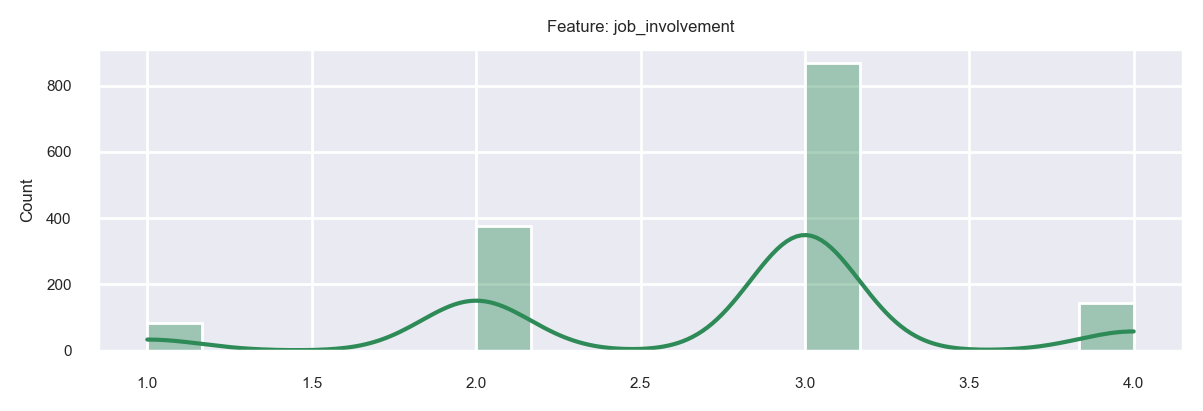

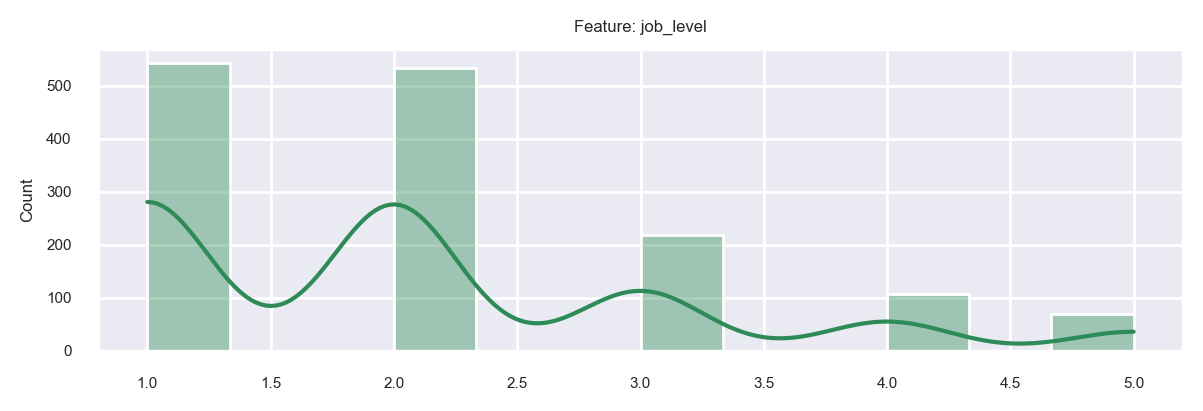

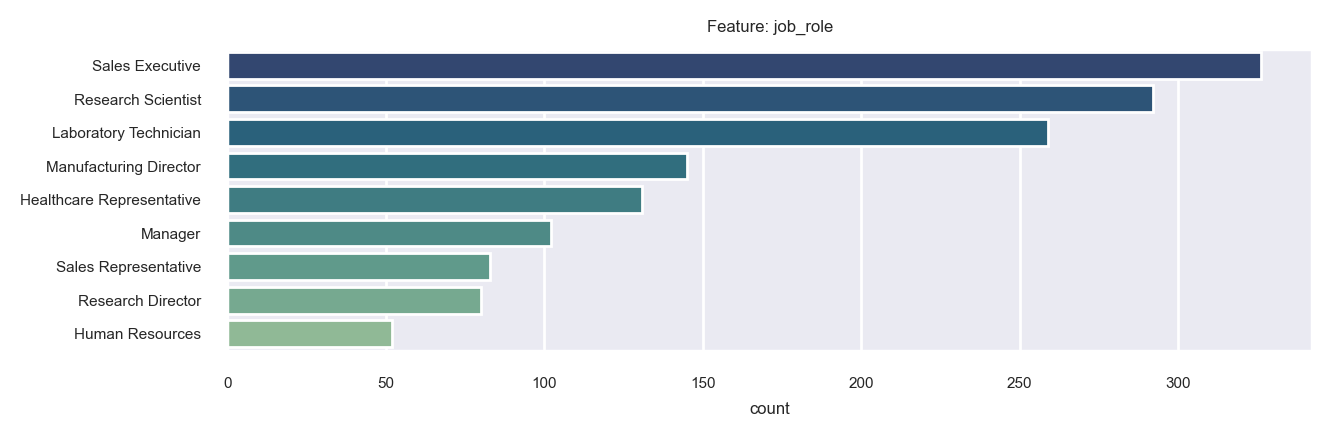

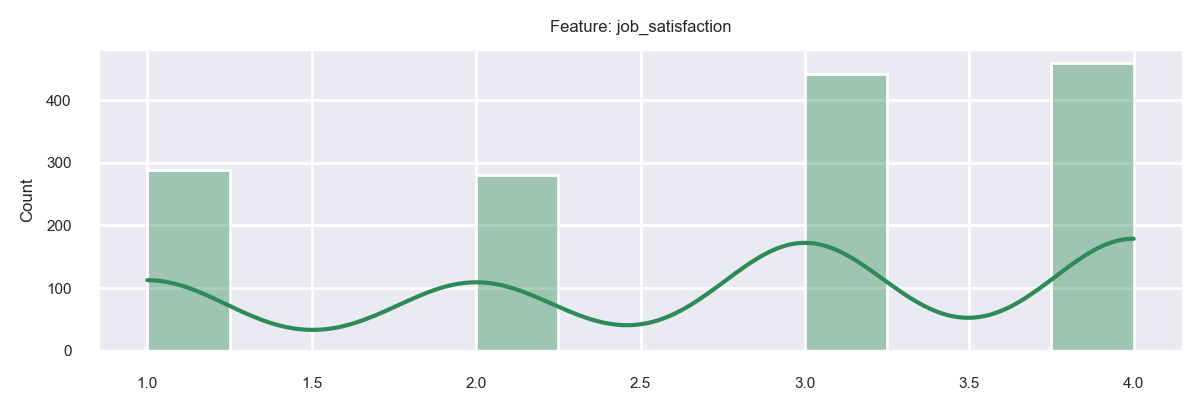

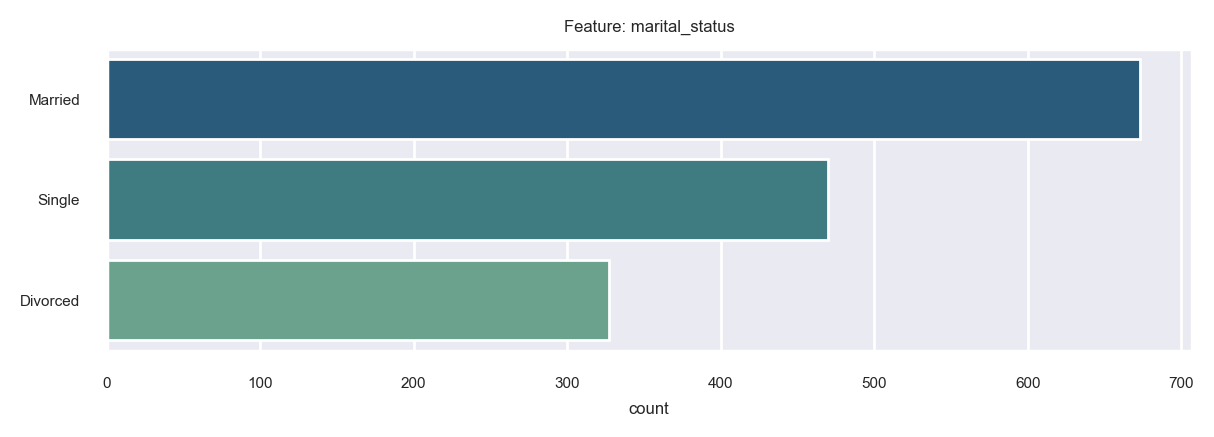

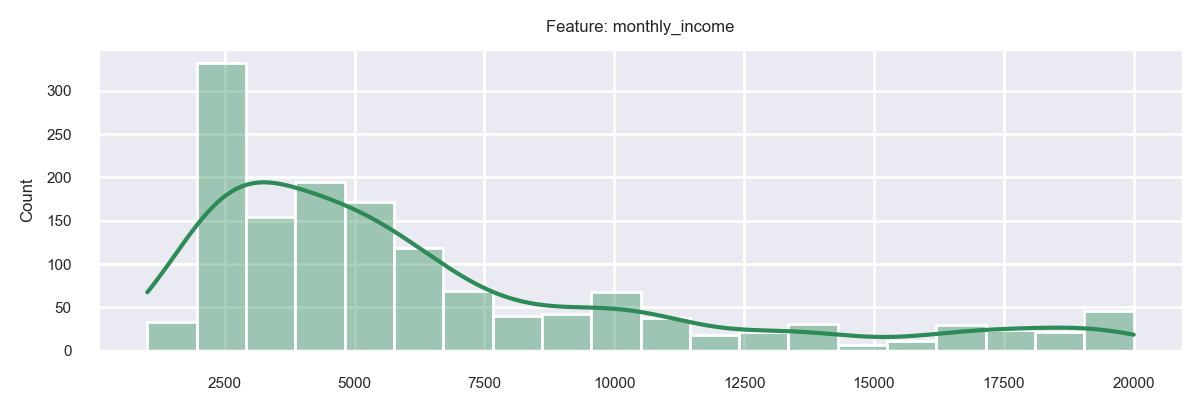

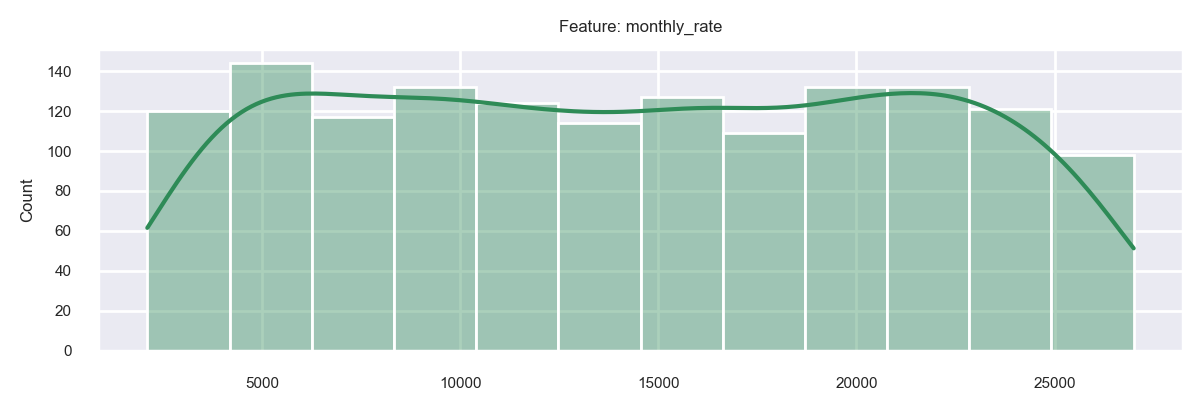

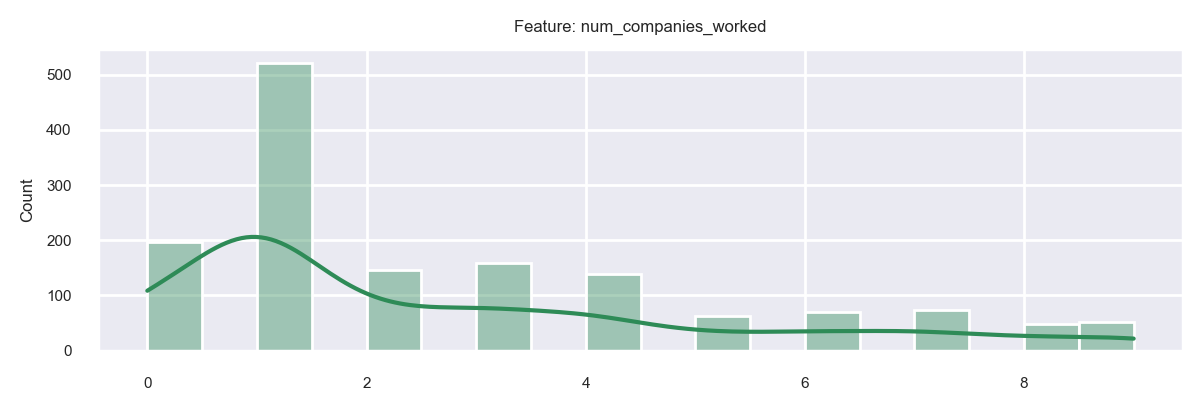

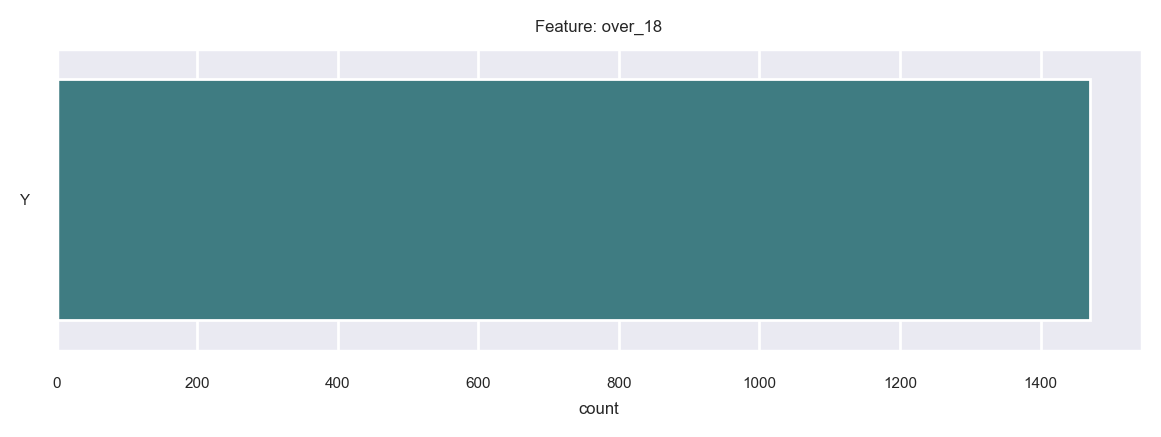

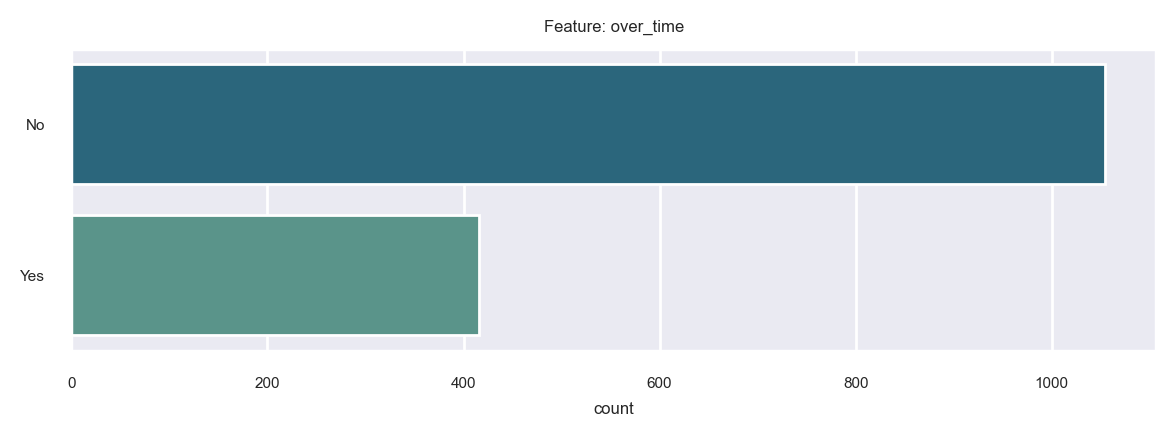

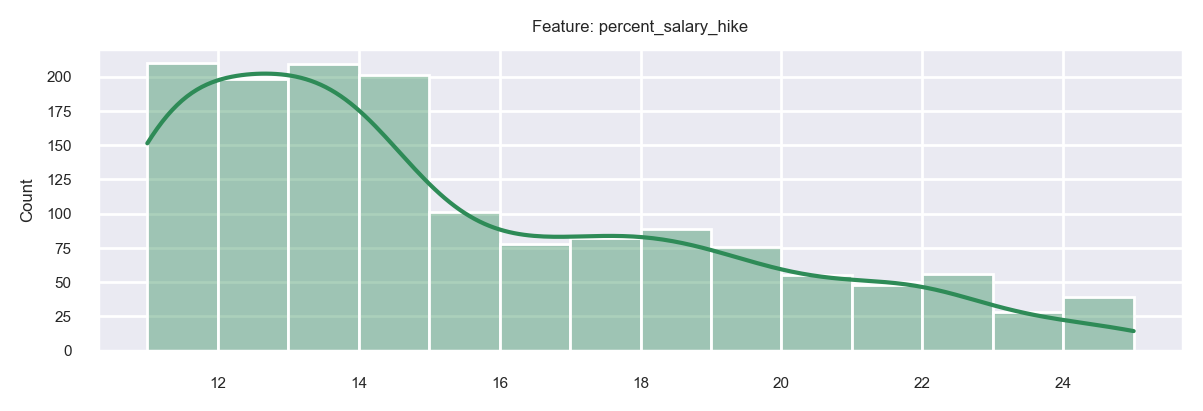

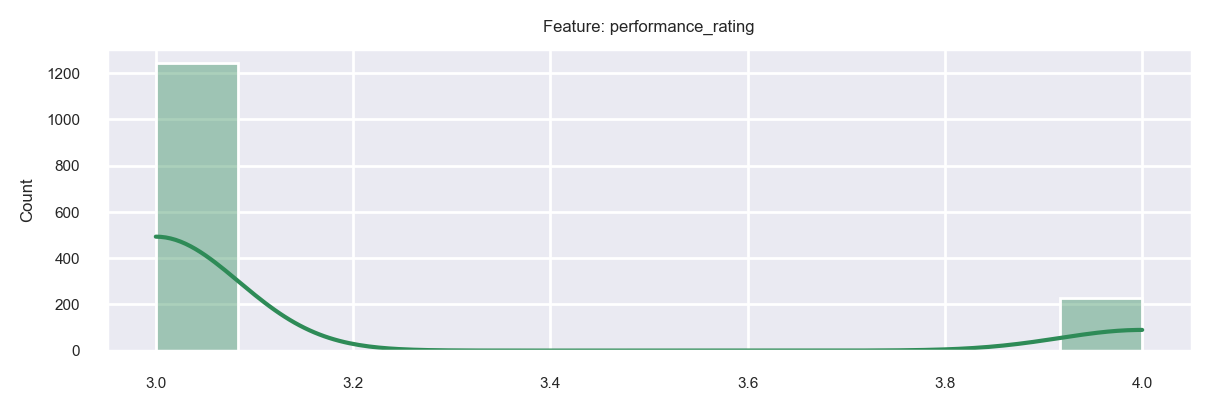

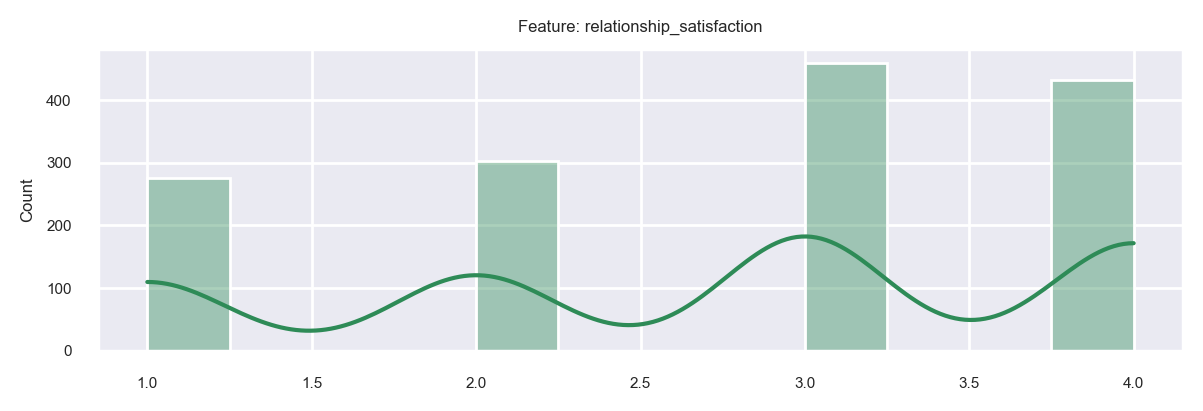

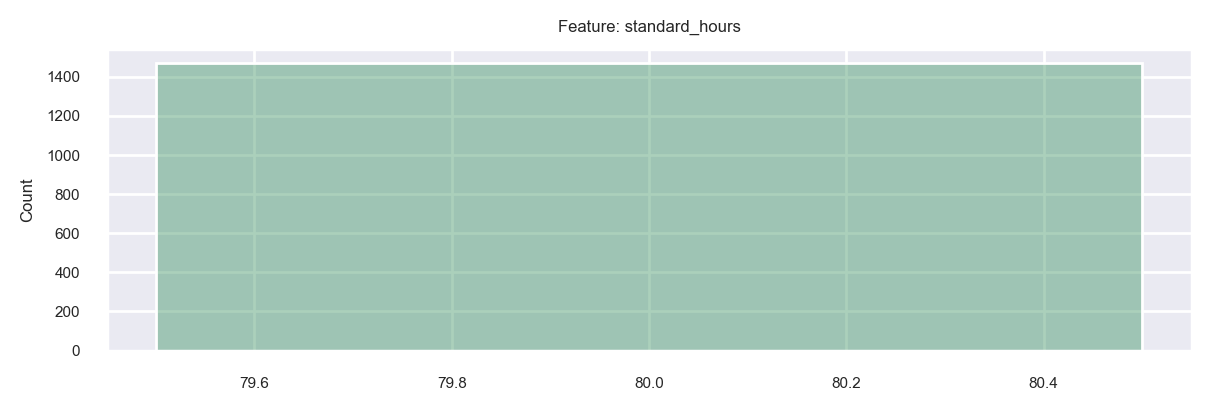

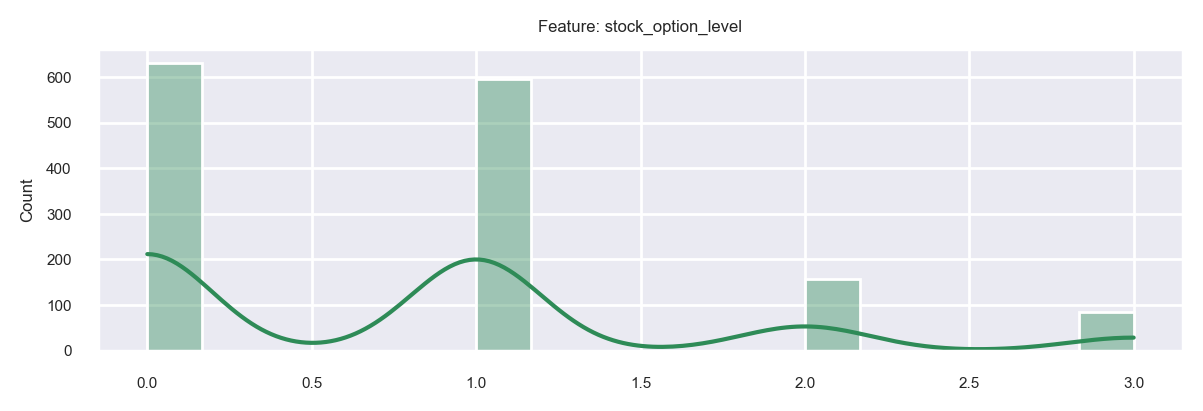

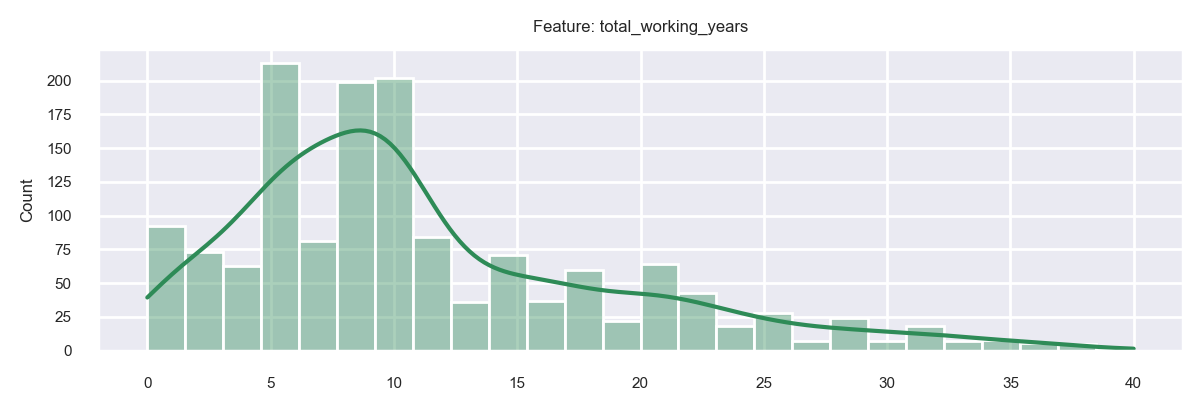

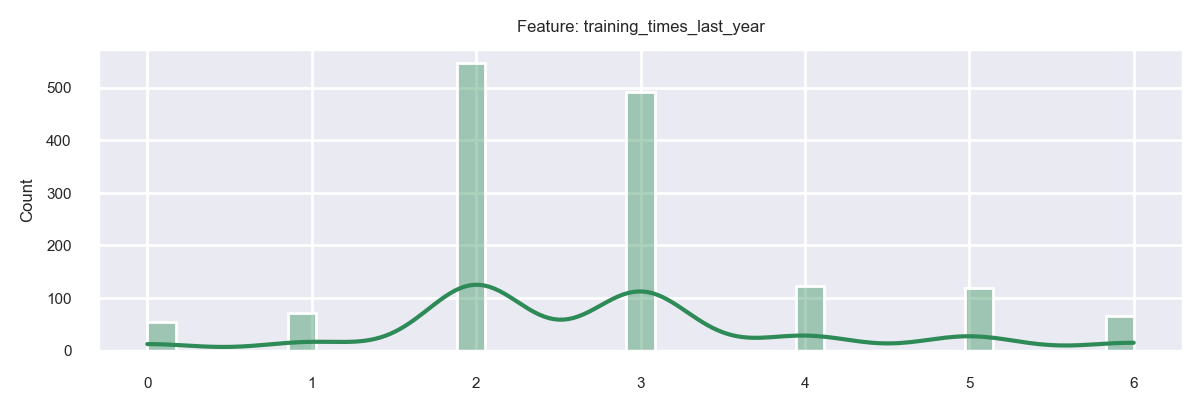

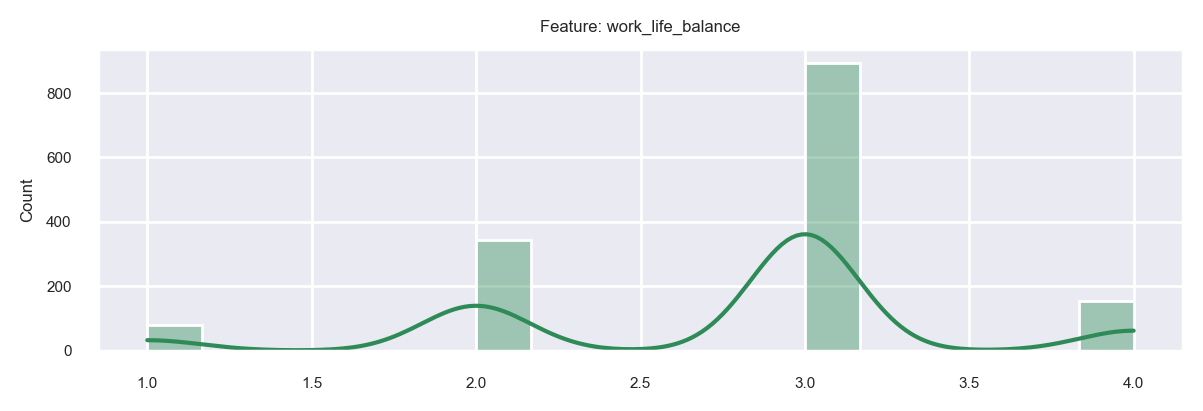

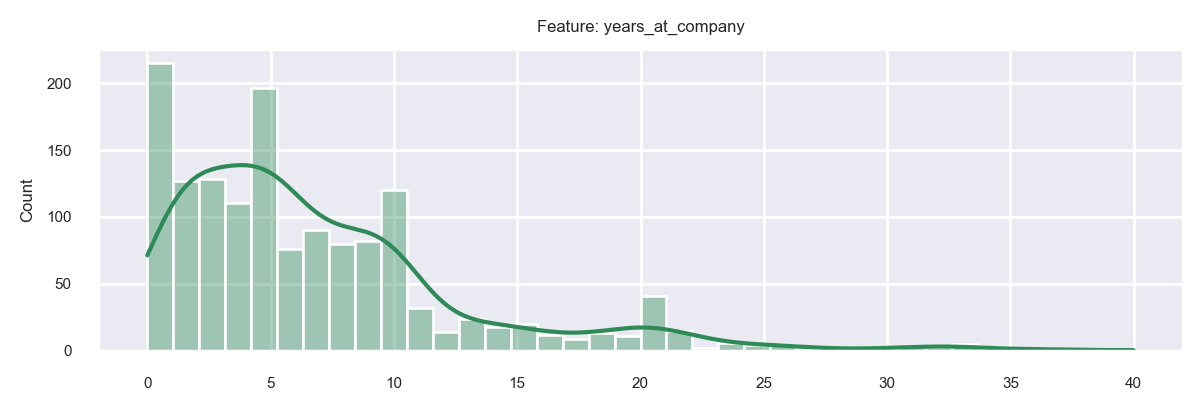

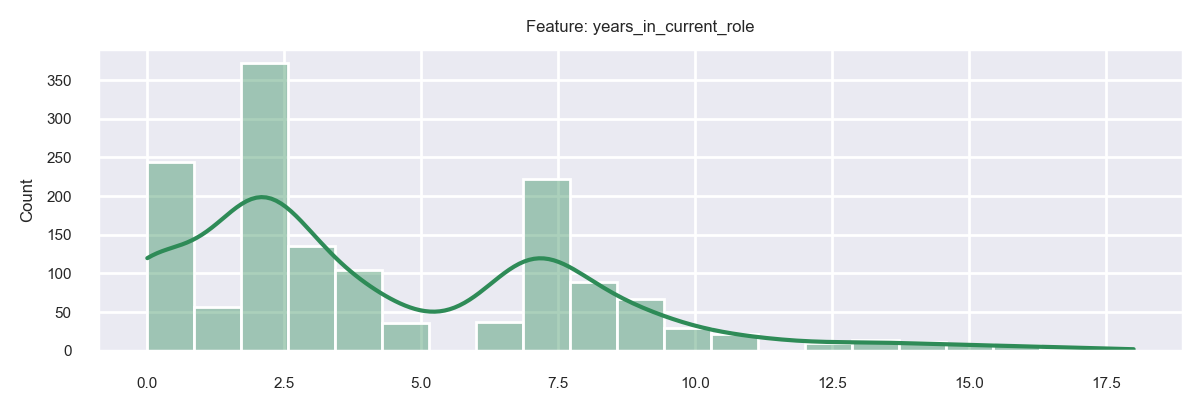

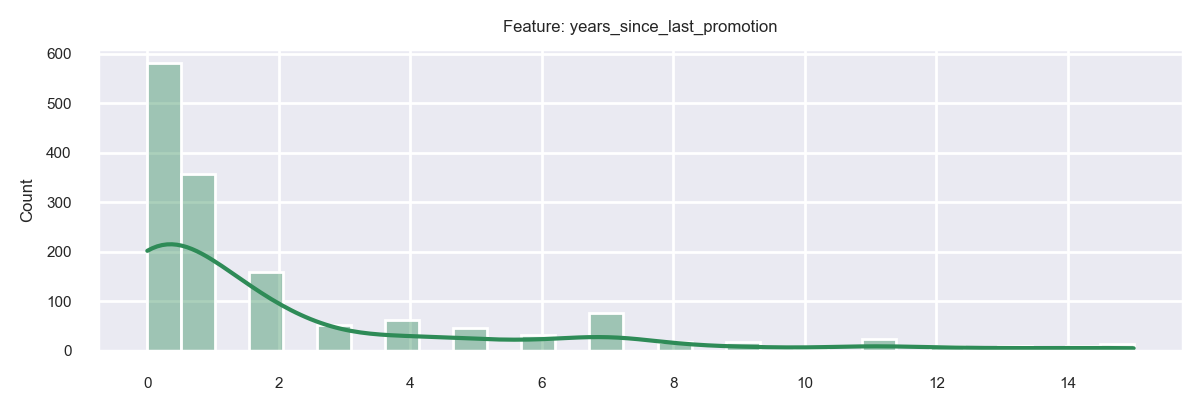

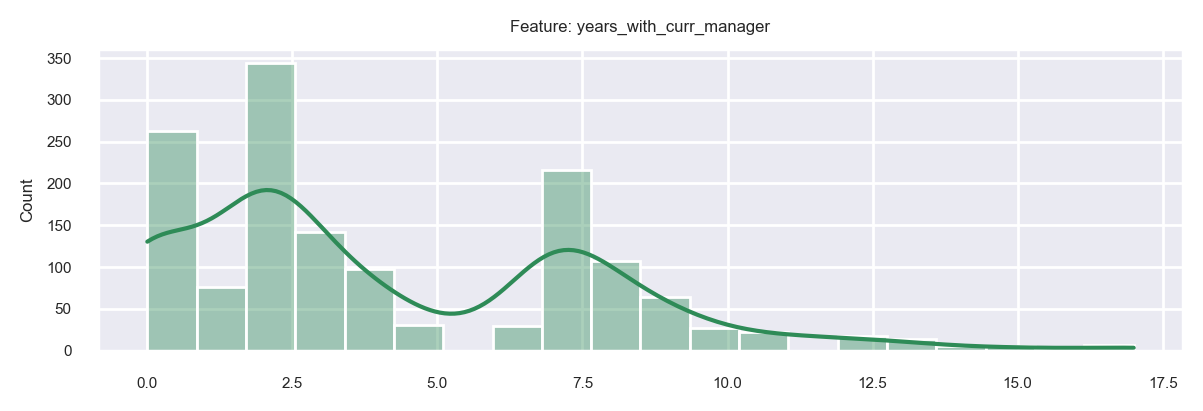

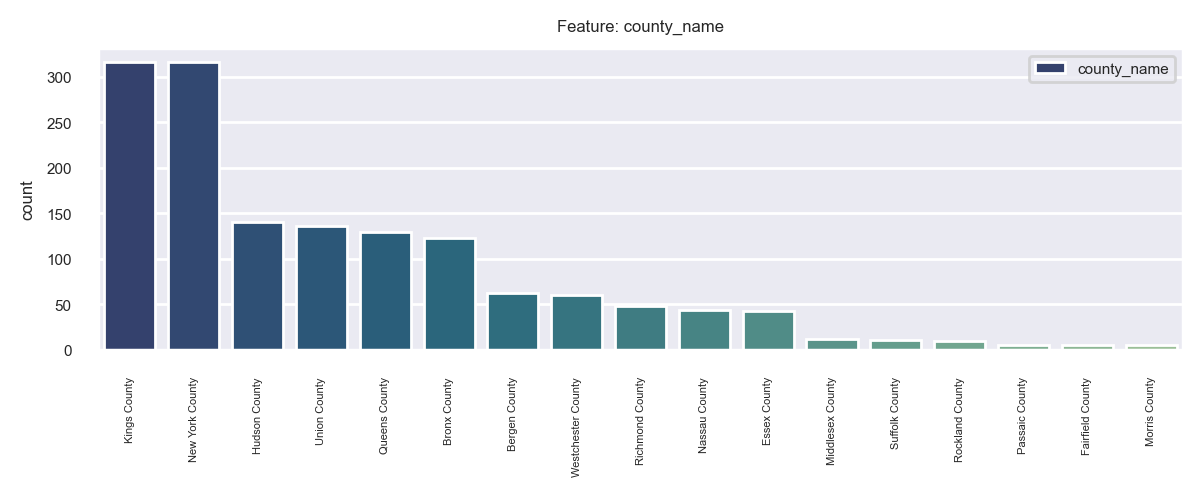

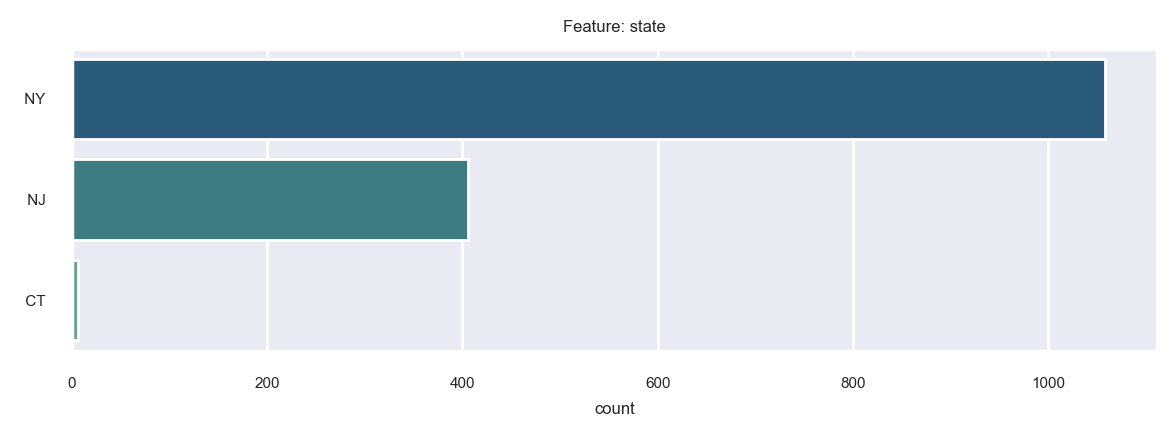

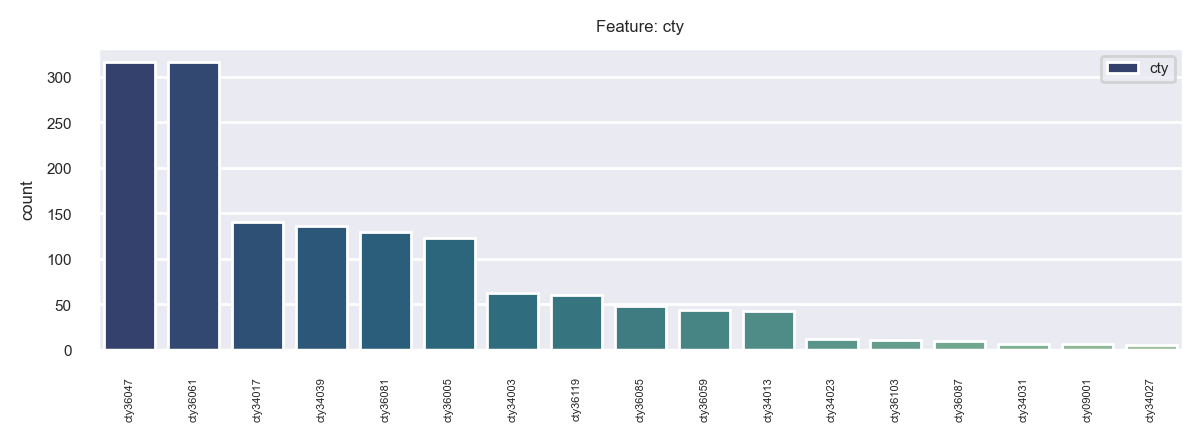

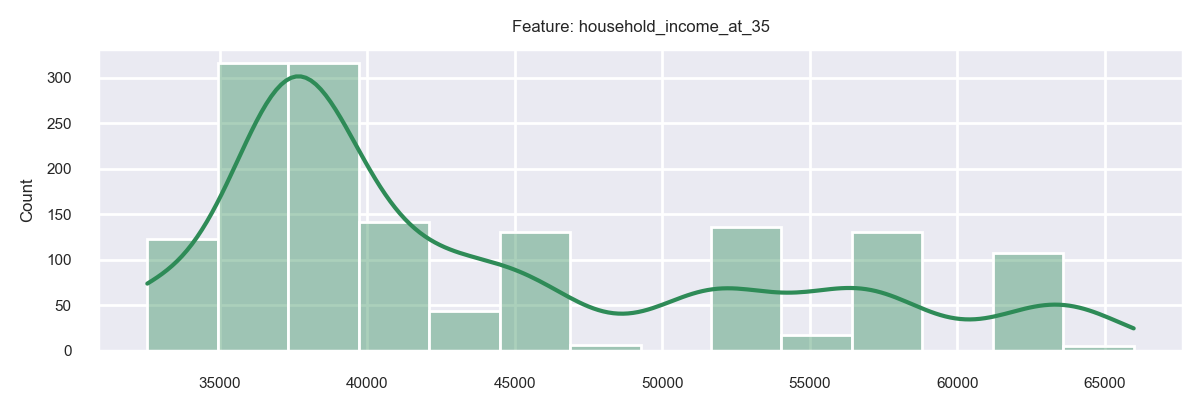

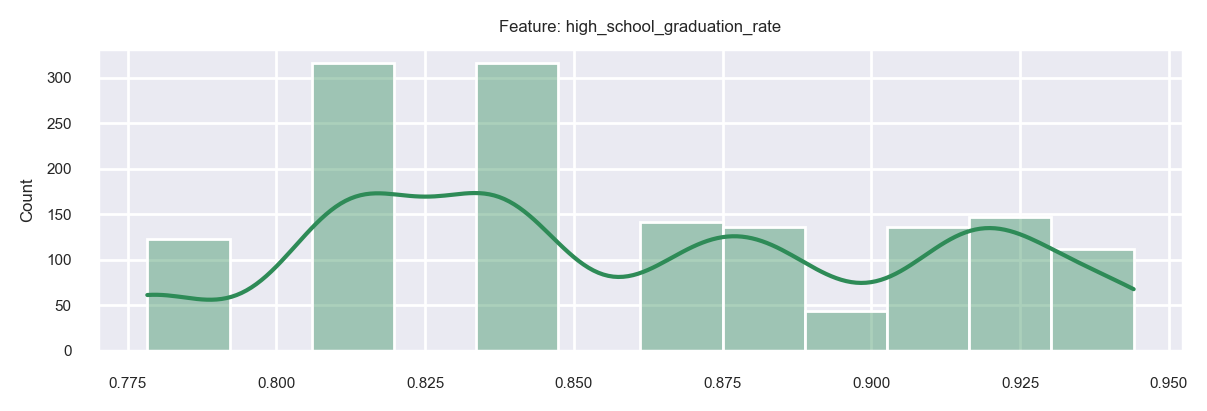

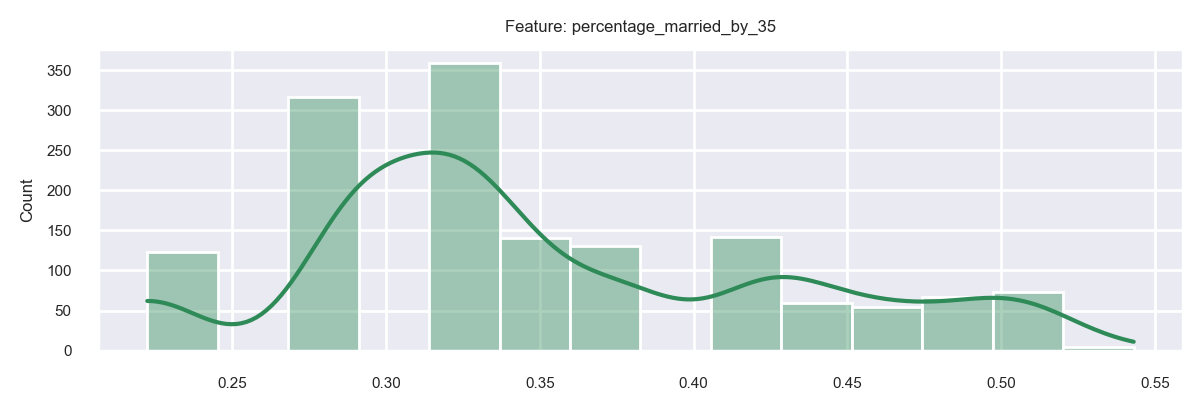

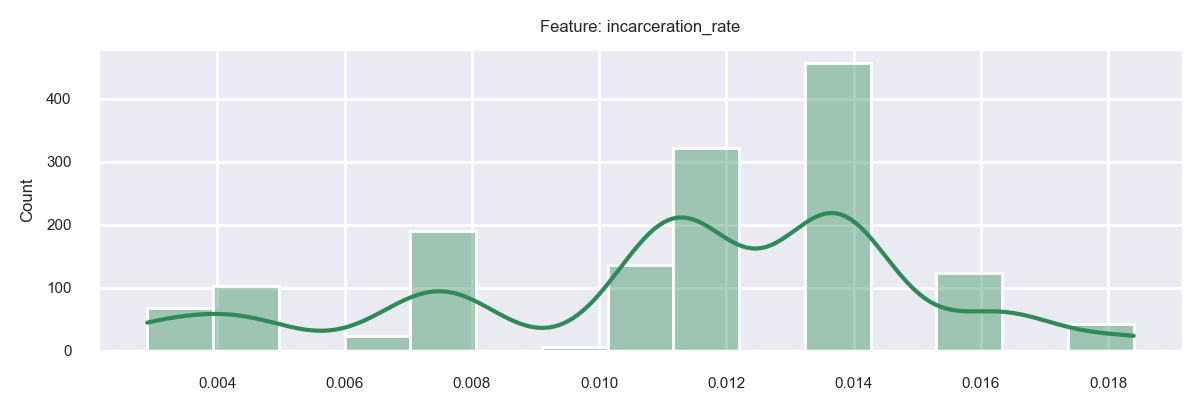

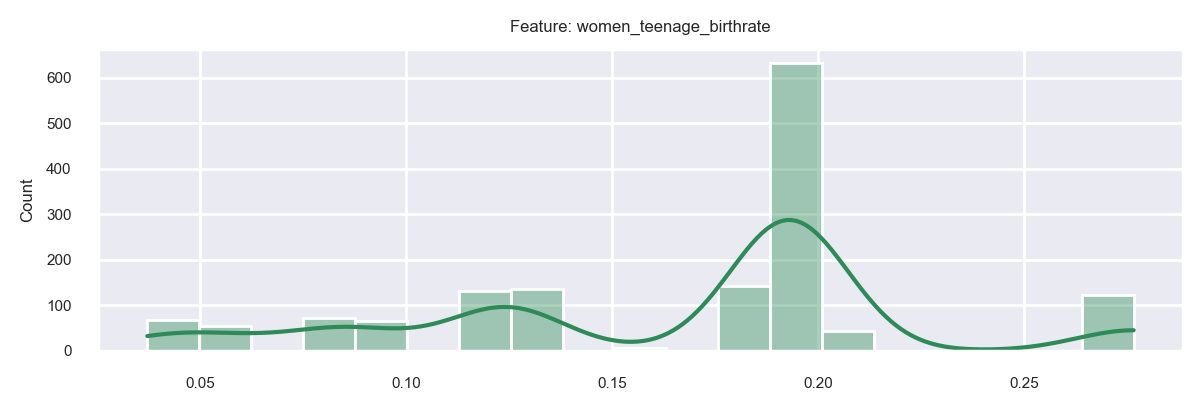

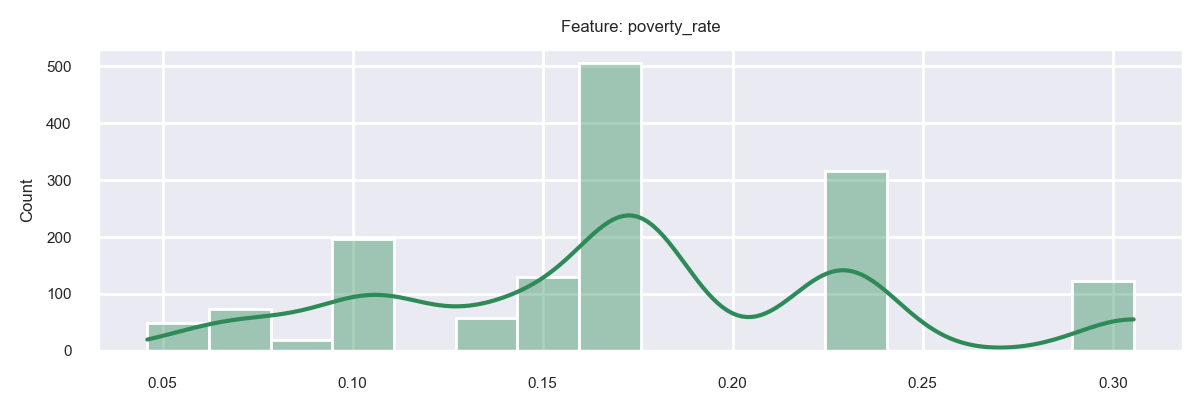

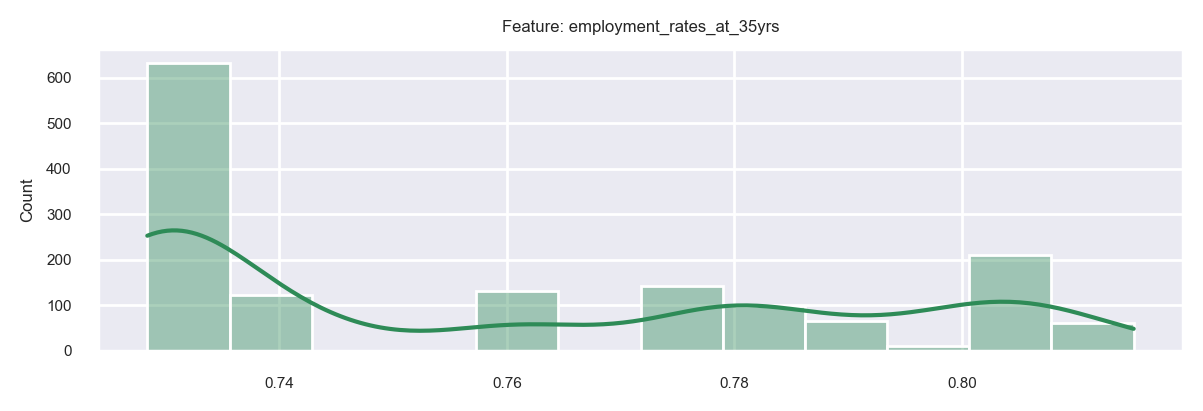

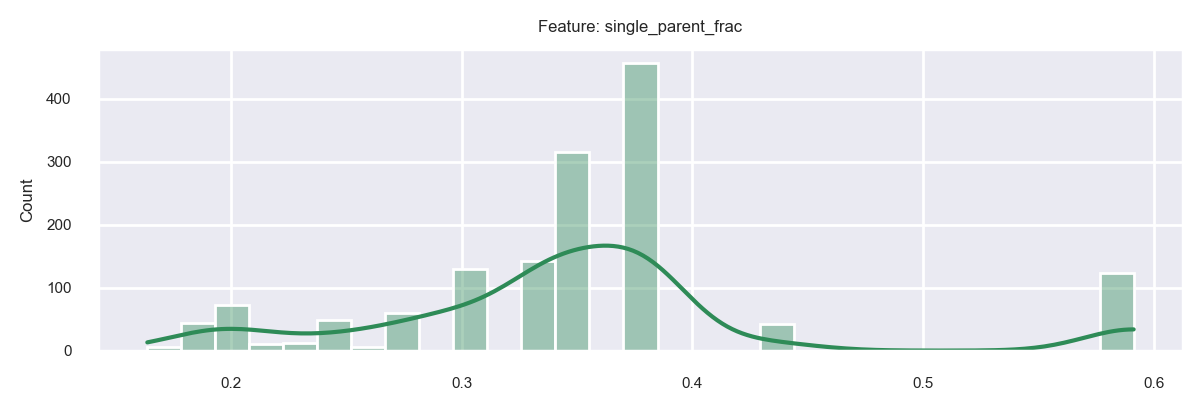

In [23]:
# plotting individual columns/features by data type

for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        plt.figure(figsize = (7, 2))
        sns.histplot(
            df[col],
            color = "seagreen",
            alpha = 0.4,
            kde = True)

        plt.title(f'Feature: {col}')
        plt.xlabel(None)
        plt.show()
    
    elif col == "cty" or col == "county_name": 
        # treating large discrete count plots seperate
        plt.figure(figsize = (7, 2))
        sns.countplot(
            df[col],
            order = df[col].value_counts().index,
            label = col, 
            palette="crest_r")

        plt.legend()
        # plt.xticks(rotation = 90)
        plt.tick_params(
                        axis='x', # changes apply to the x-axis
                        rotation = 90,
                        labelsize = 4)
        plt.xlabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

    else:
        plt.figure(figsize = (7, 2))
        sns.countplot(
            y = df[col],
            order = df[col].value_counts().index, 
            orient = "h", 
            palette="crest_r")

        plt.ylabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

In [25]:
# classifiying features by data type = discrete/categorical or continuous 

disc_lst = df.select_dtypes(exclude = "number").columns.sort_values().tolist()
cont_lst = df.select_dtypes(include = "number").columns.sort_values().tolist()

print(f'discrete variables:\n{disc_lst}')
print()
print(f'continuous variables:\n{cont_lst}')

discrete variables:
['attrition', 'business_travel', 'county_name', 'cty', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_time', 'state']

continuous variables:
['age', 'daily_rate', 'distance_from_home', 'education', 'employment_rates_at_35yrs', 'environment_satisfaction', 'high_school_graduation_rate', 'hourly_rate', 'household_income_at_35', 'incarceration_rate', 'job_involvement', 'job_level', 'job_satisfaction', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'percentage_married_by_35', 'performance_rating', 'poverty_rate', 'relationship_satisfaction', 'single_parent_frac', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'women_teenage_birthrate', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


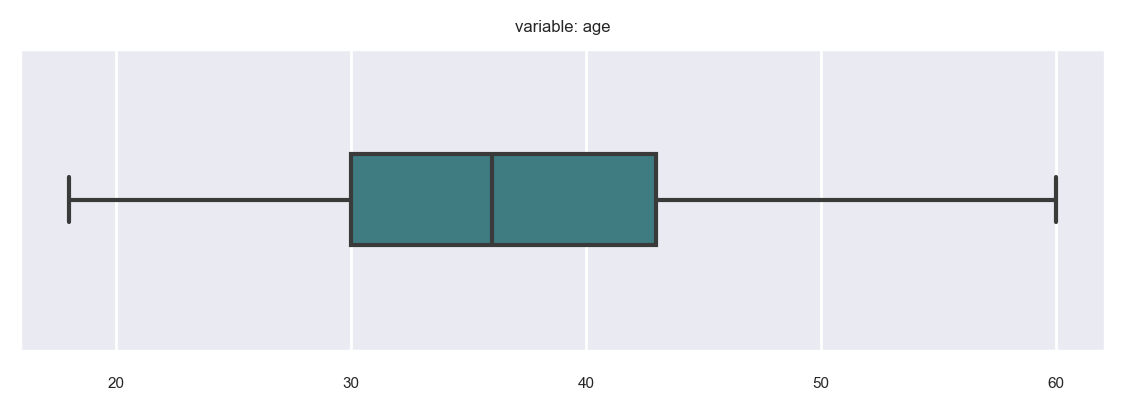

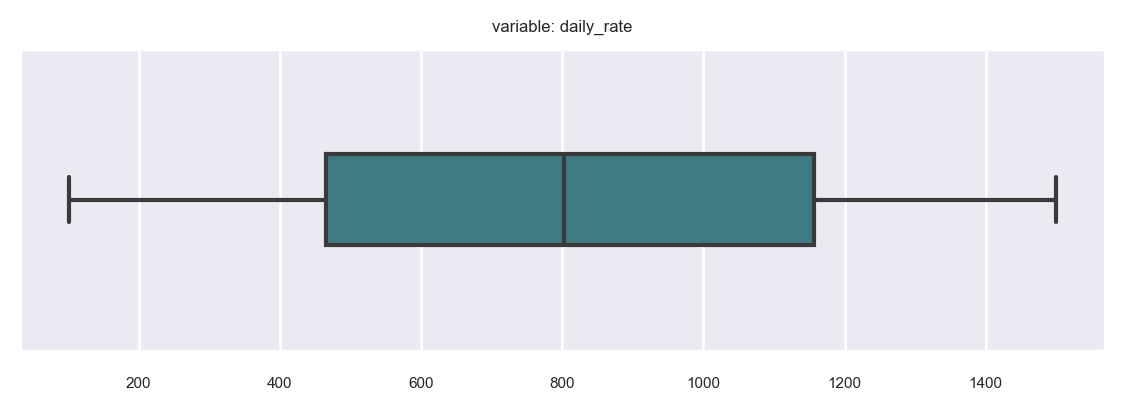

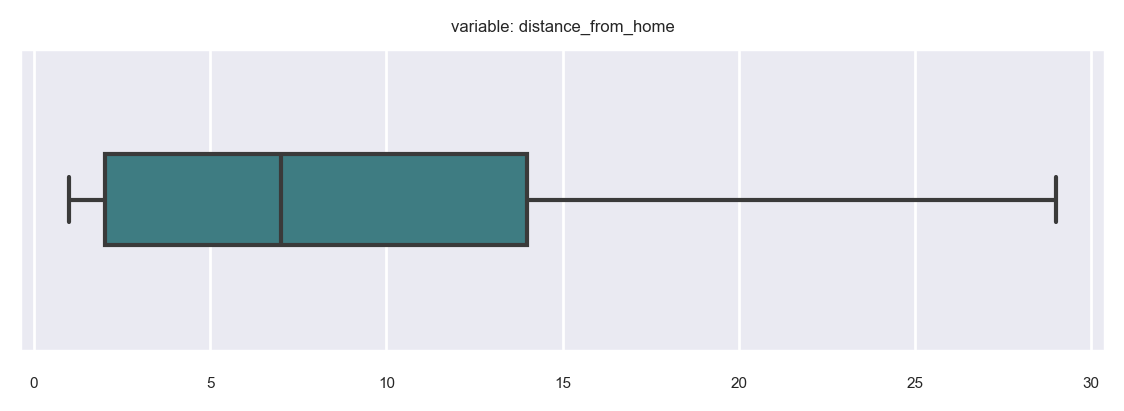

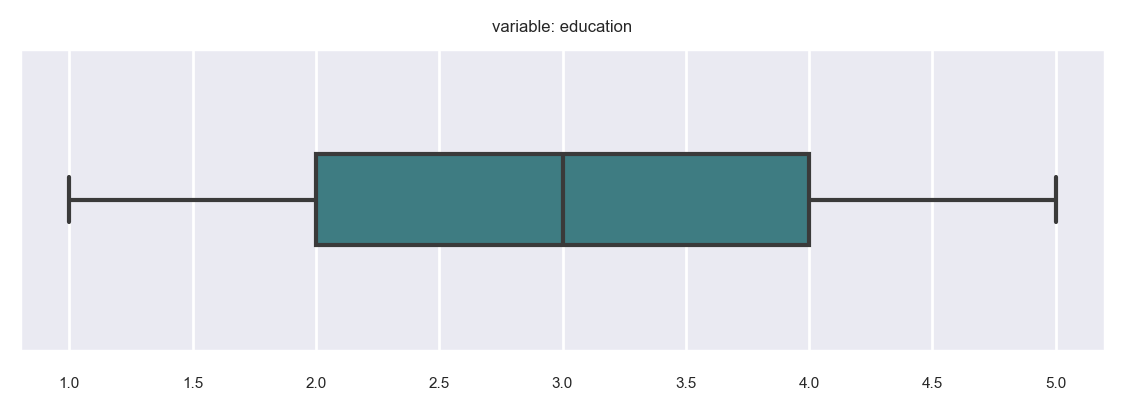

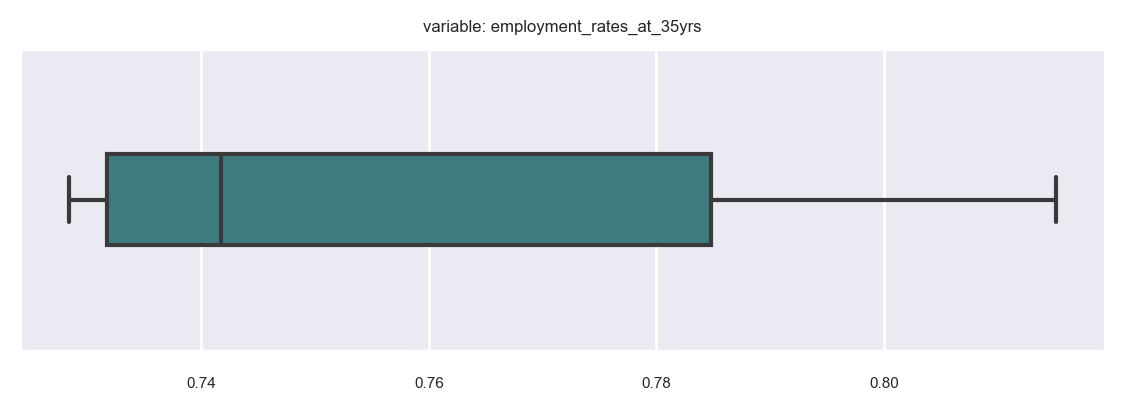

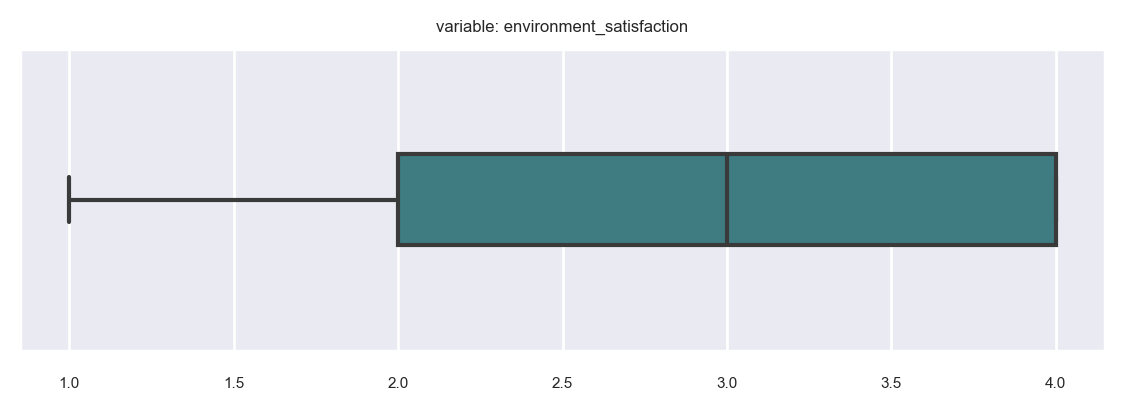

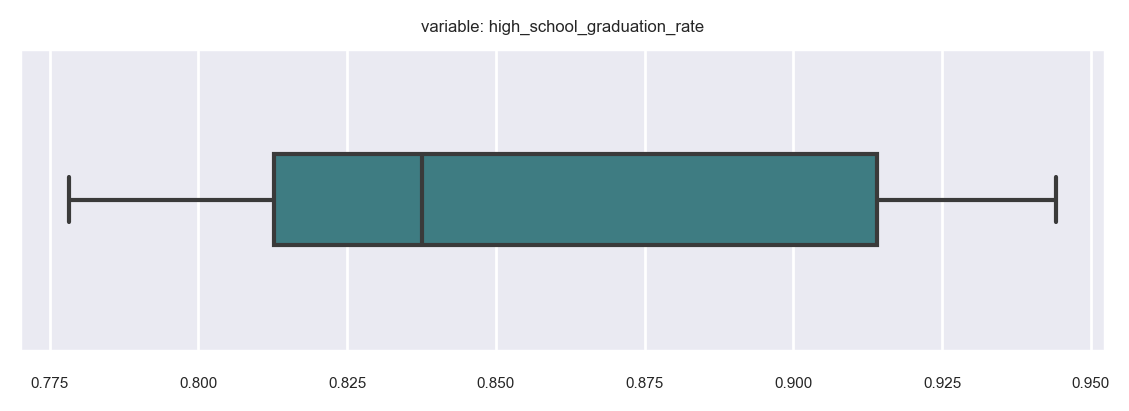

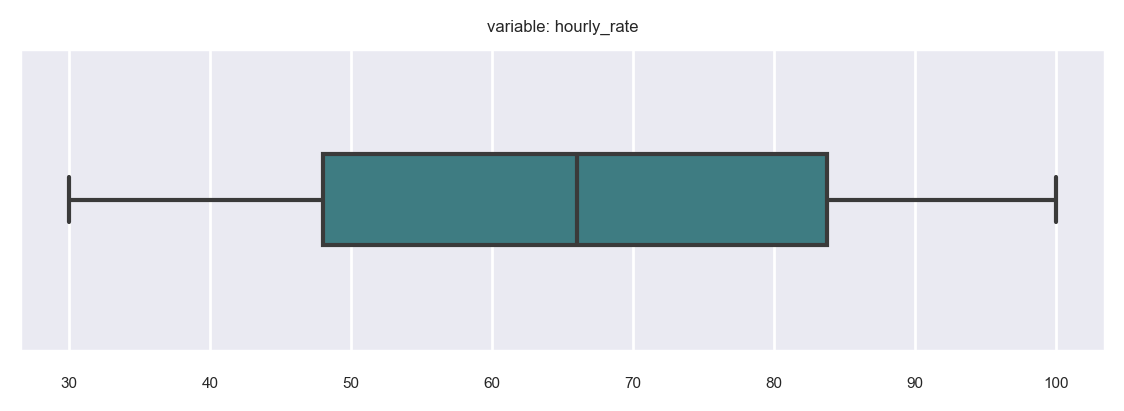

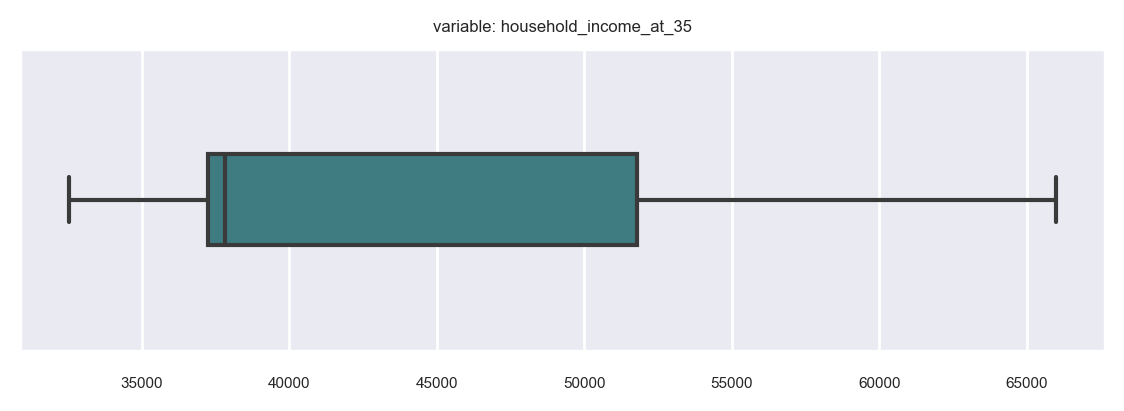

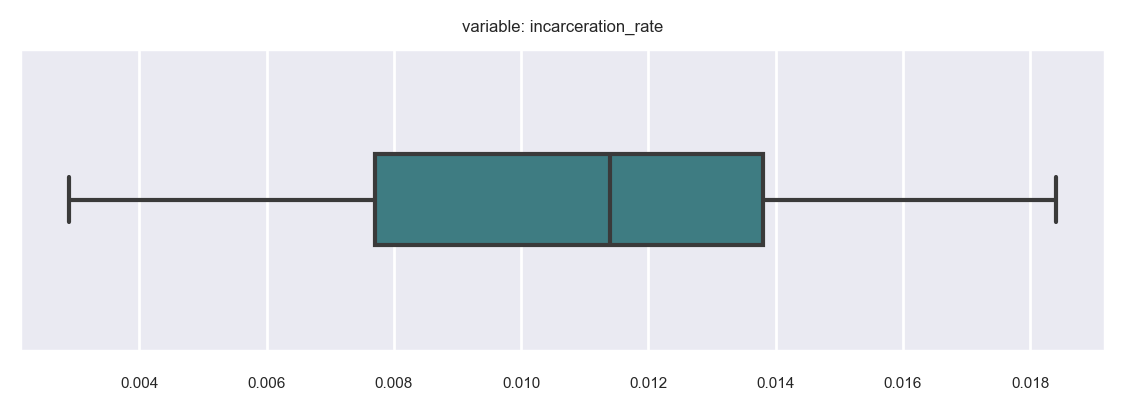

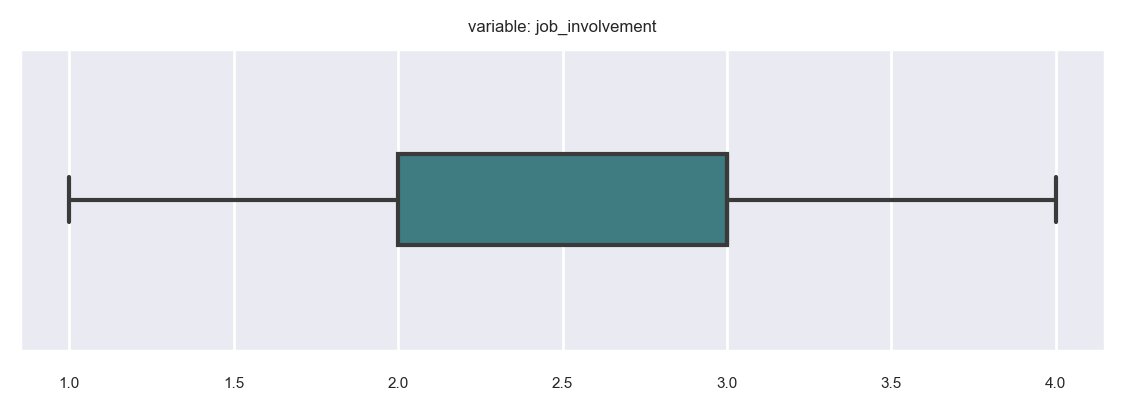

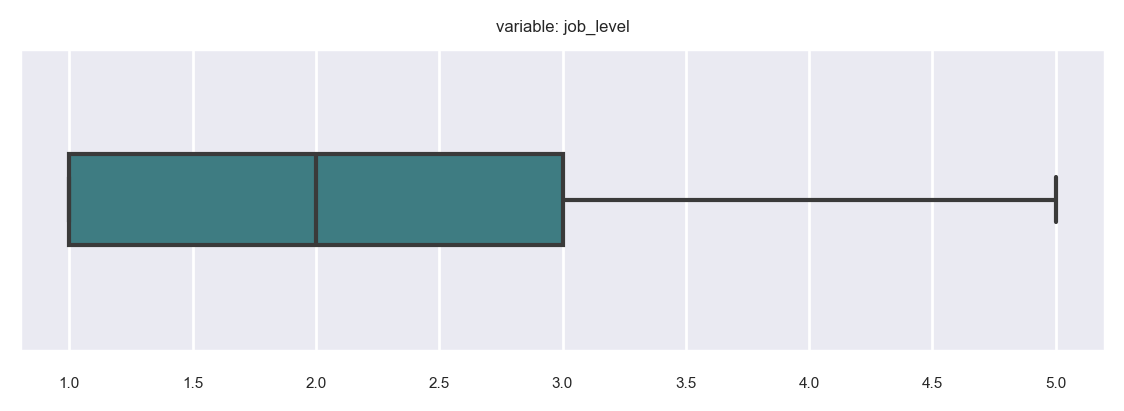

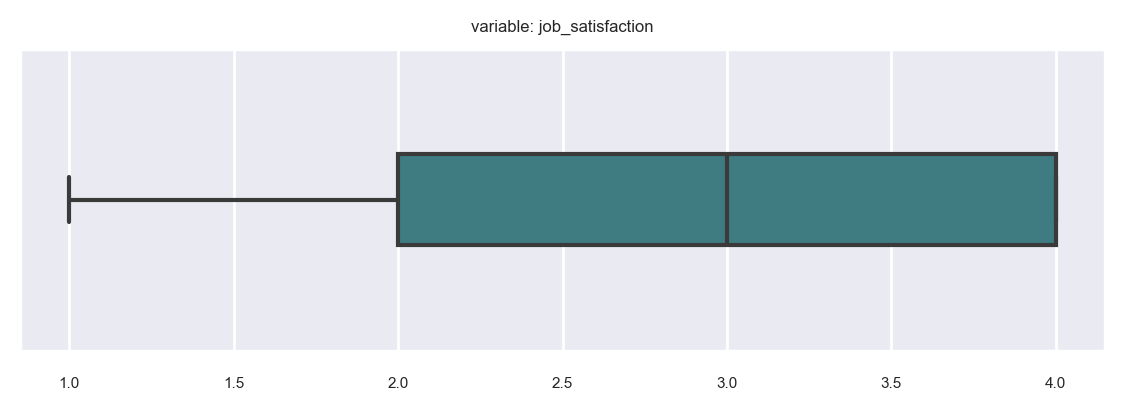

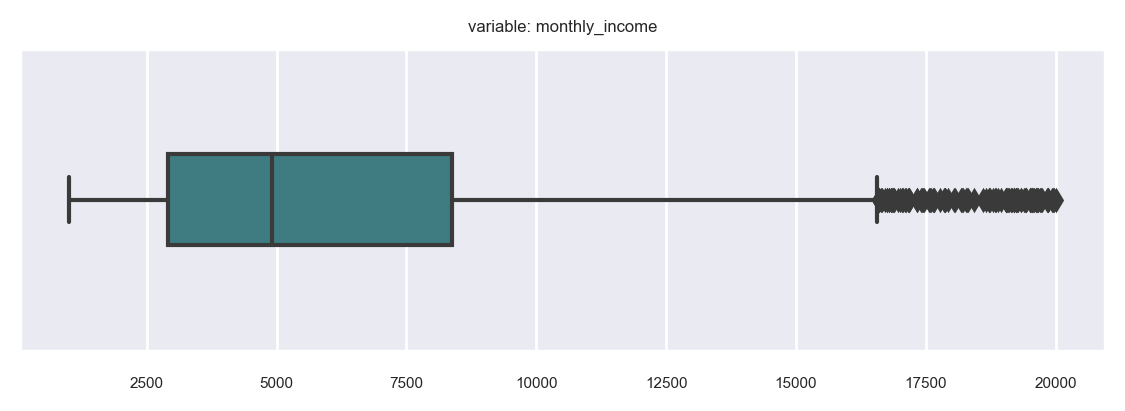

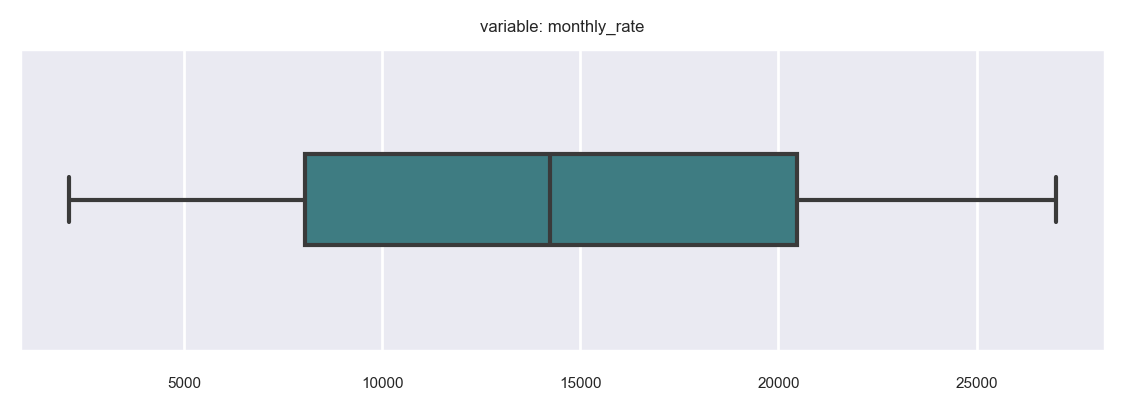

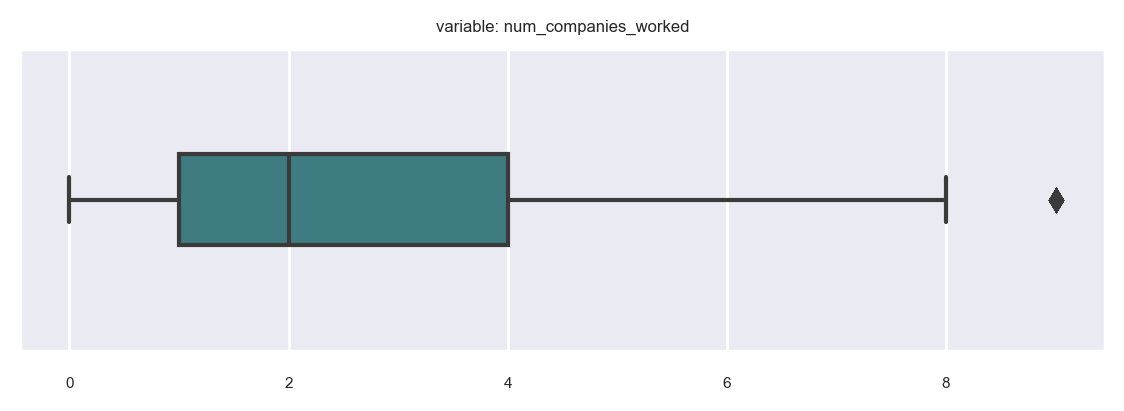

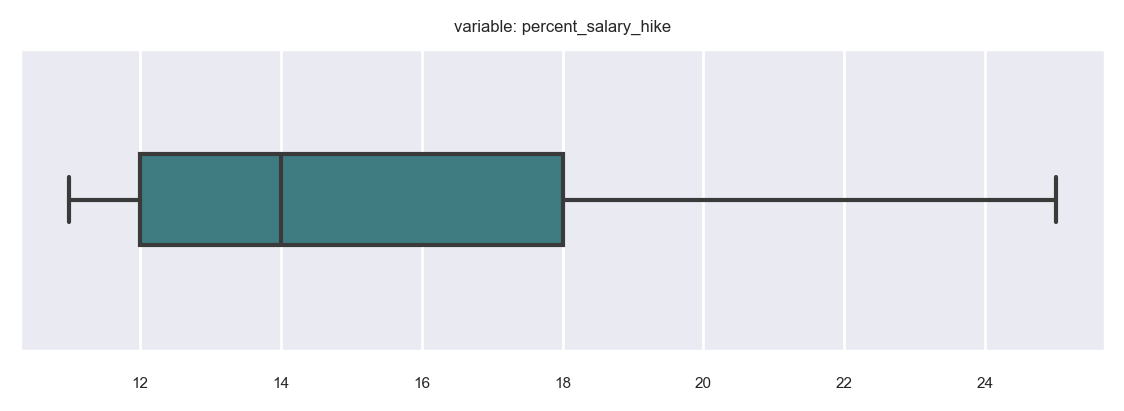

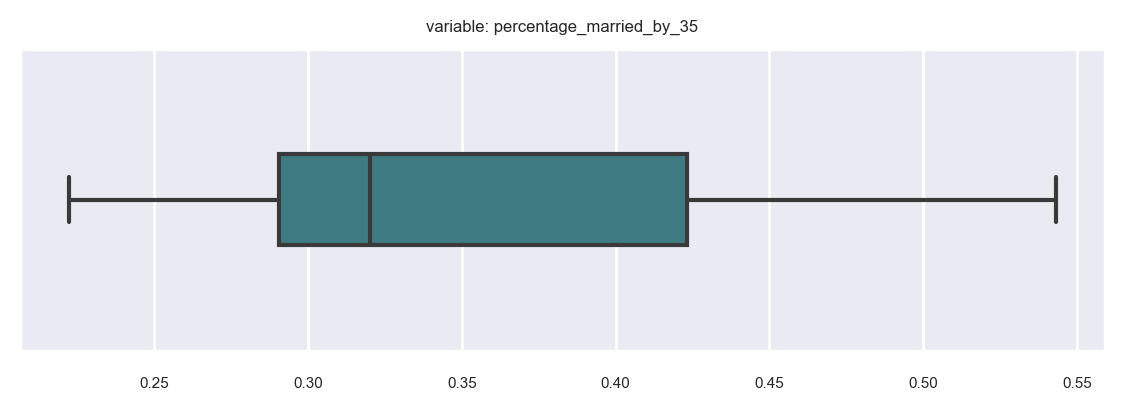

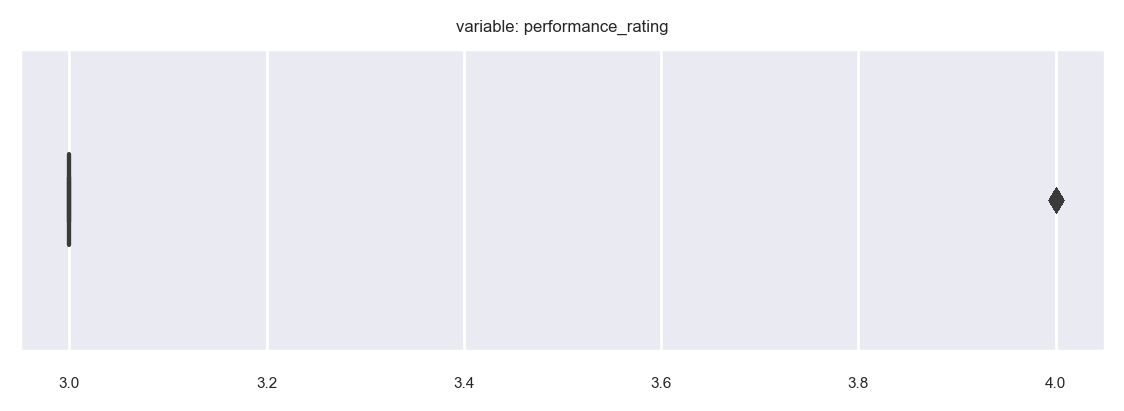

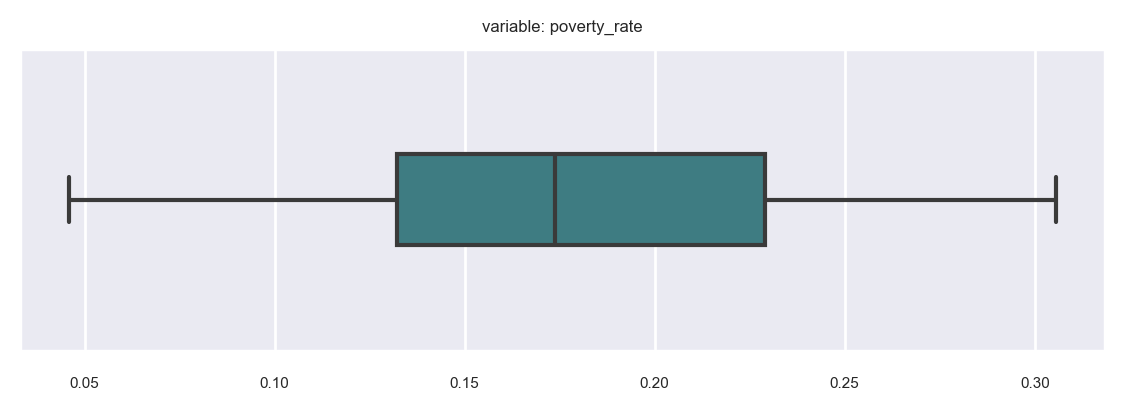

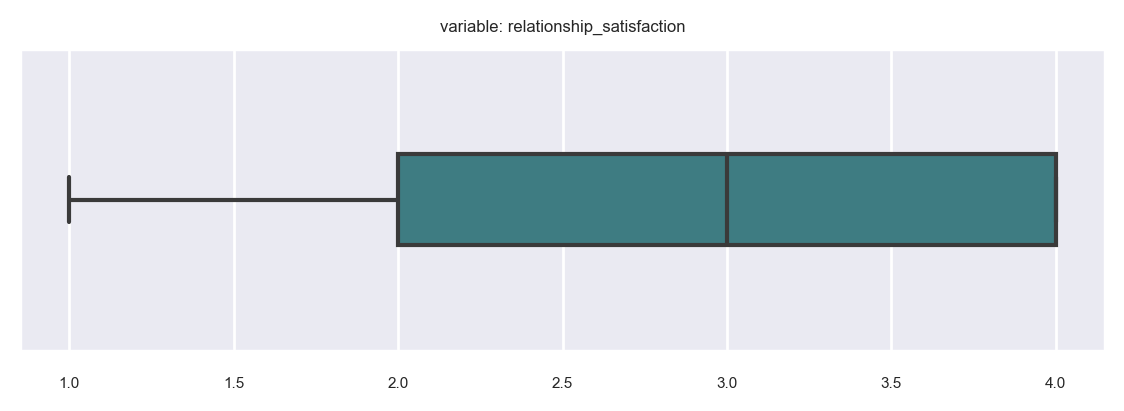

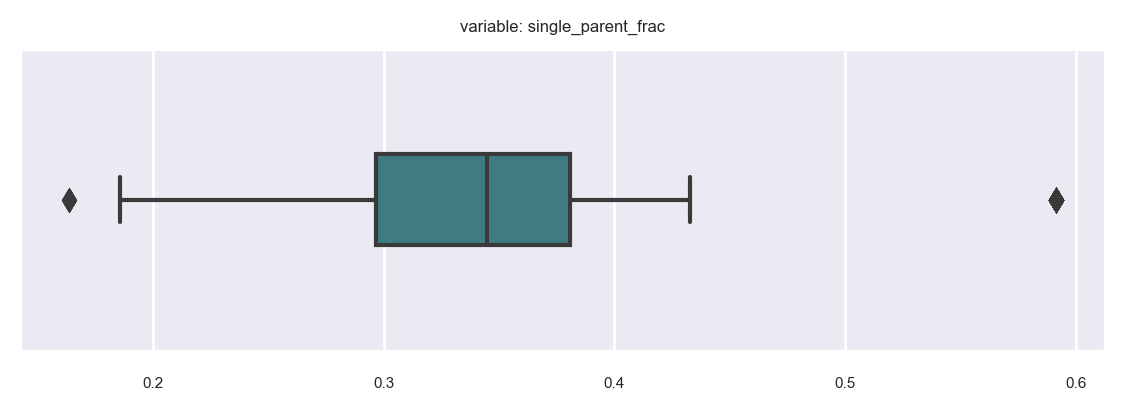

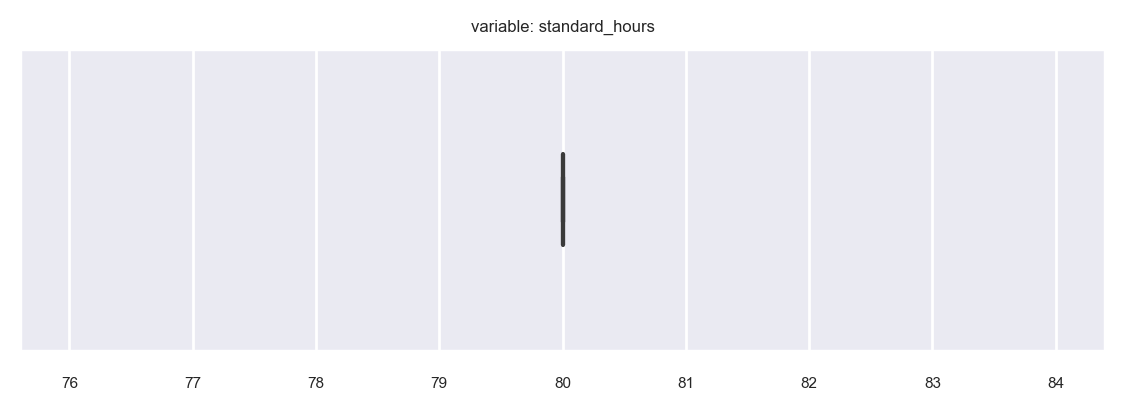

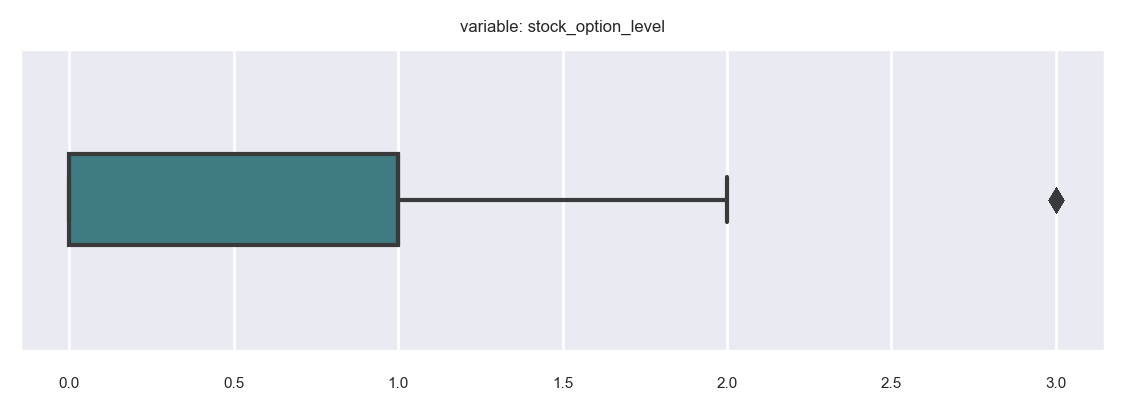

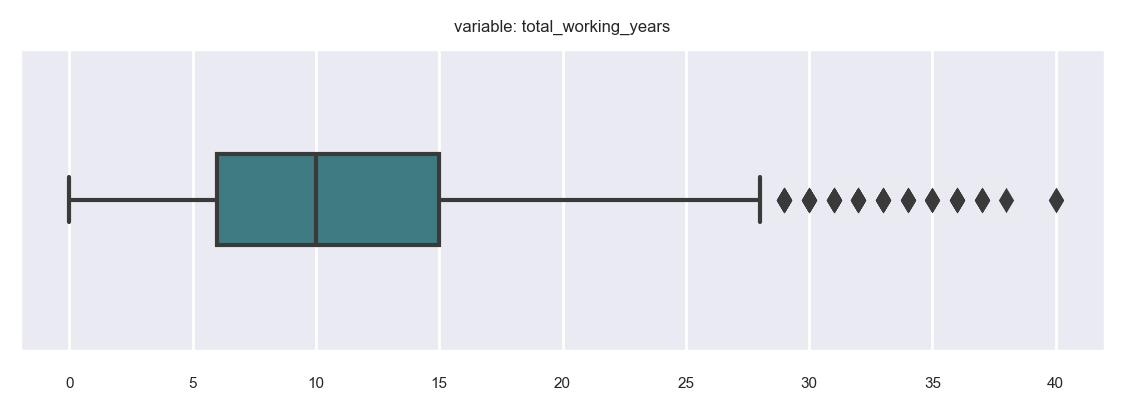

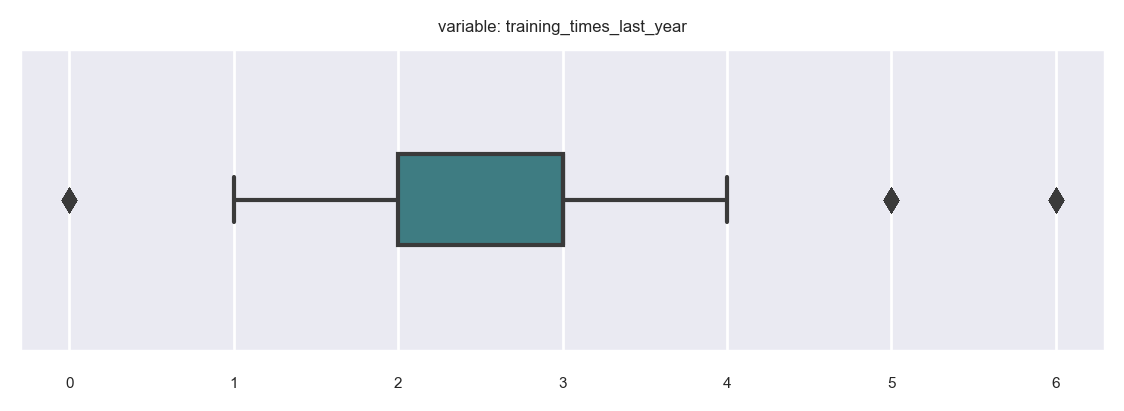

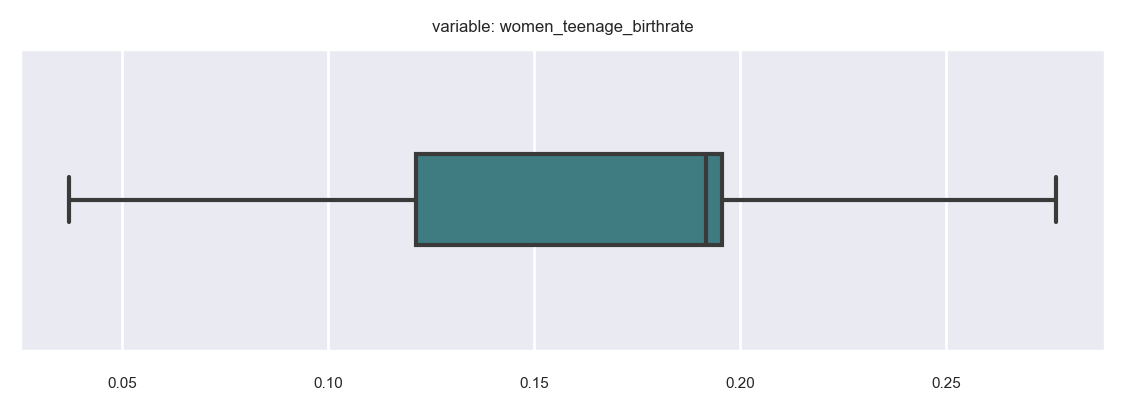

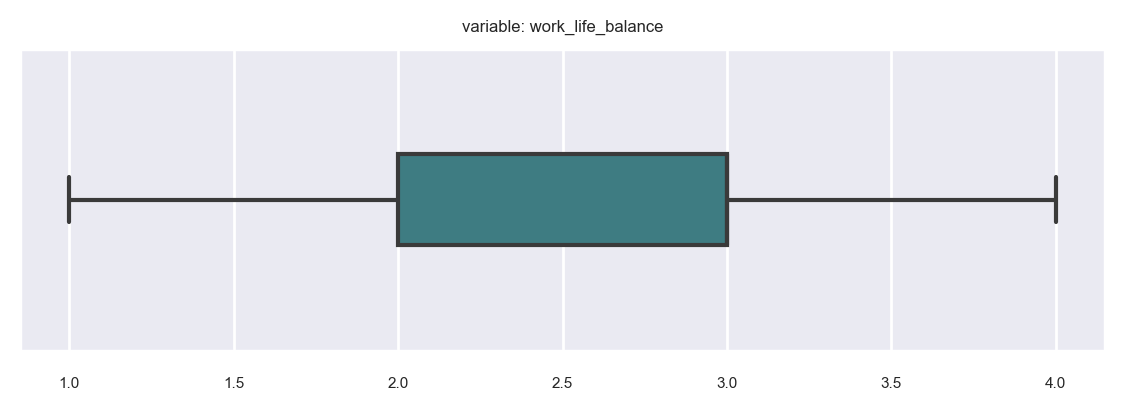

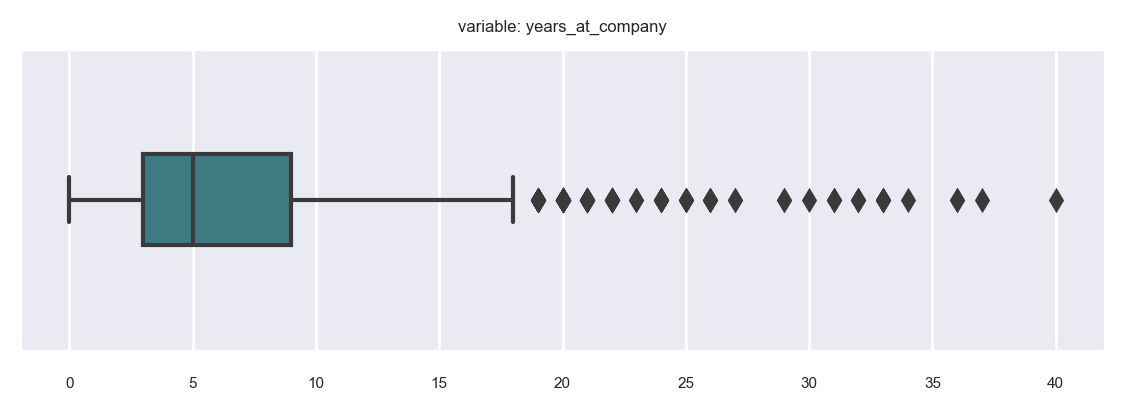

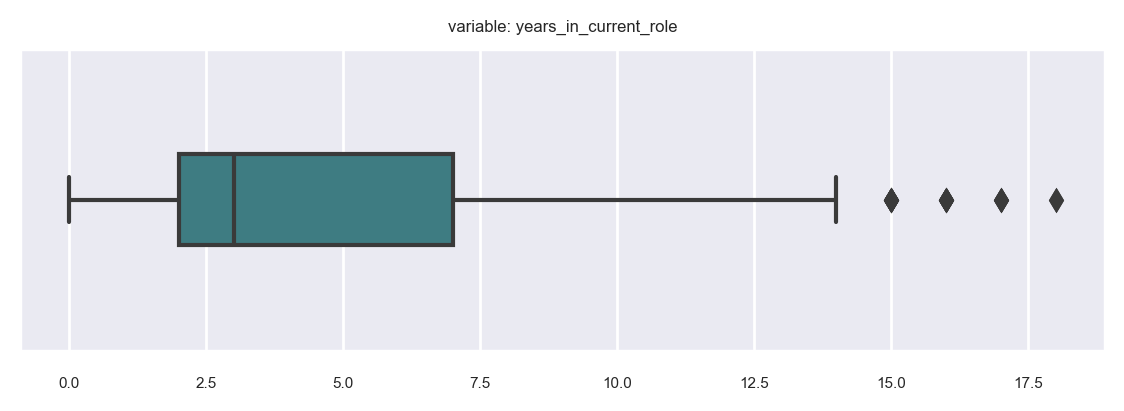

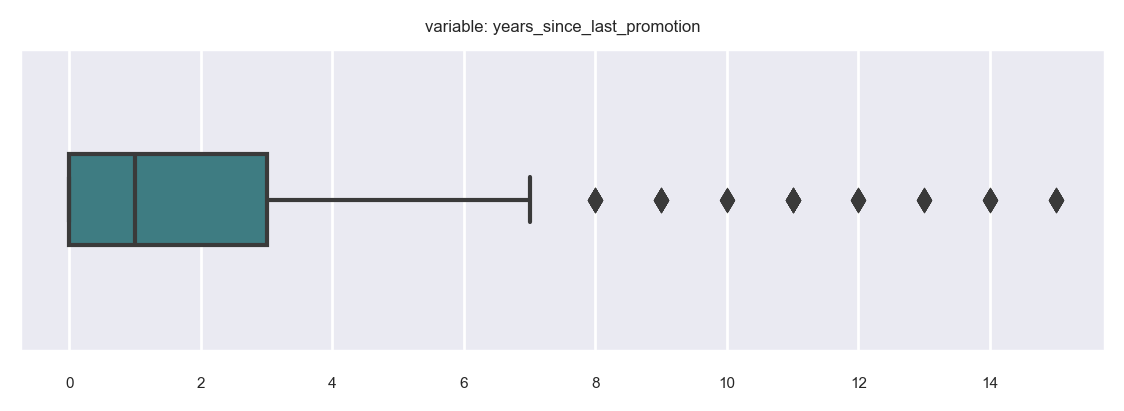

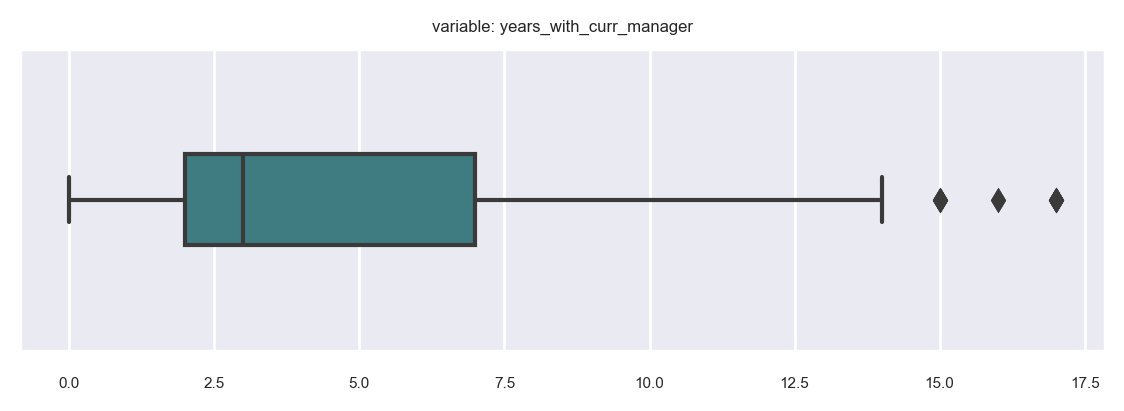

In [26]:
# box plots for continuous variables: are there outliers in the features?

for col in cont_lst:
    plt.figure(figsize = (7, 2))

    sns.boxplot(
        df[col],
        orient = "h", 
        palette = "crest", 
        width= 0.3)

    plt.title(f'variable: {col}')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.show()

In [ ]:
# continuous variables: lower and upper bounds using interquartile (IQR) range
(placeholder)

In [ ]:
# univariate plotting with target variables = attrition 

# for col in cont_lst:
#     plt.figure(figsize=(7, 2))
#     sns.scatterplot(df["years_at_company"], df[col], hue = df["attrition"], s = 6)

#     plt.title(f'{col}...and total years at company')
#     plt.xlabel(None)
#     plt.show()